INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 5, 'problem': 'Ackley', 'problem_size': 100, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 400010it [06:03, 1099.21it/s]                            
INFO:root:Socjo finished in 9.009104653199513
Progress: 400010it [00:34, 11462.88it/s]                            
INFO:root:comparison finished in 8.424355630079905
INFO:root:best socjo 0.0475478307509154 best single 0.015145346052346742


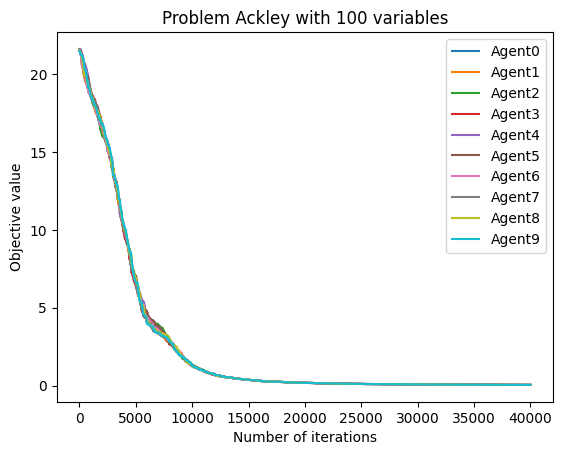

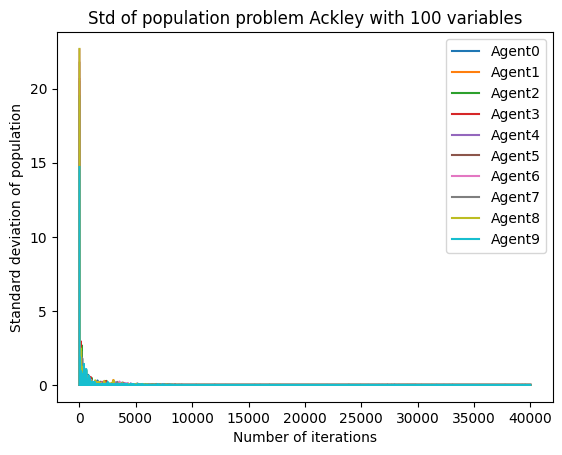

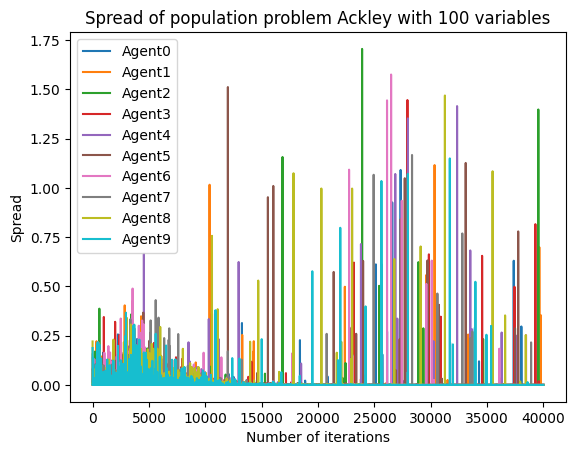

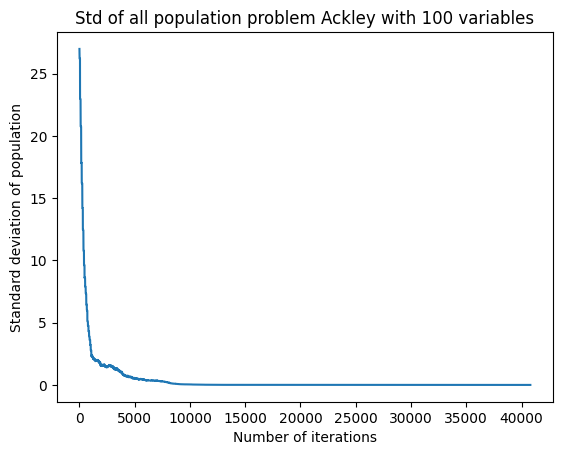

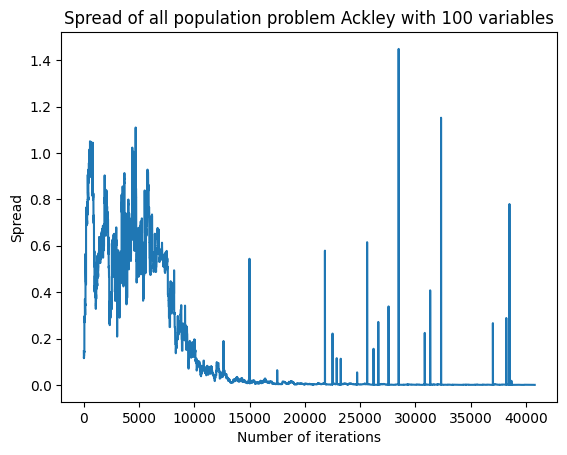

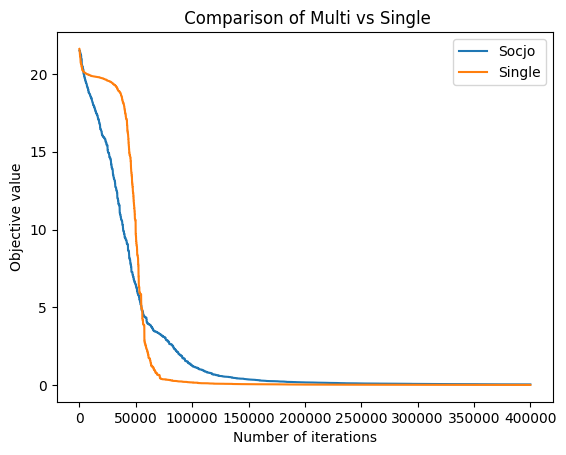

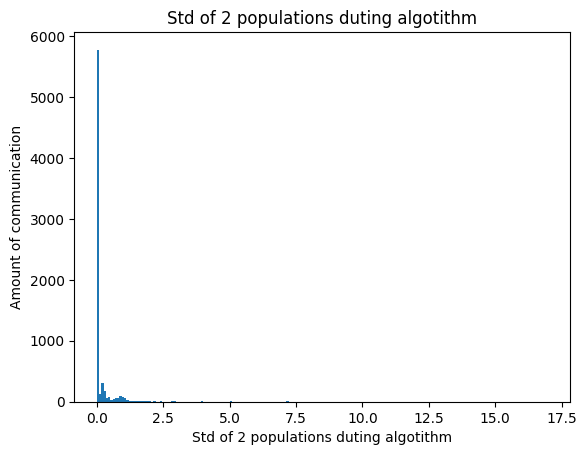

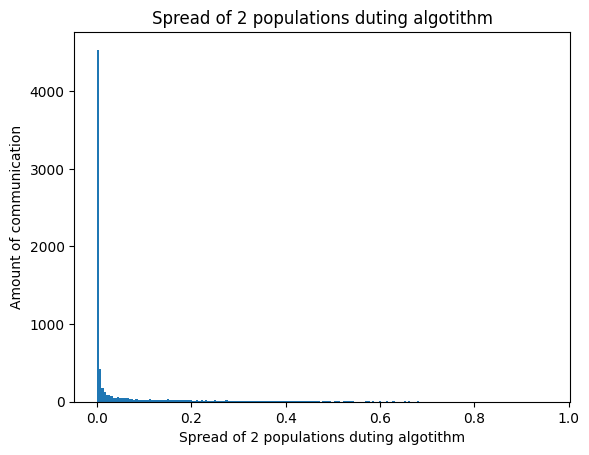

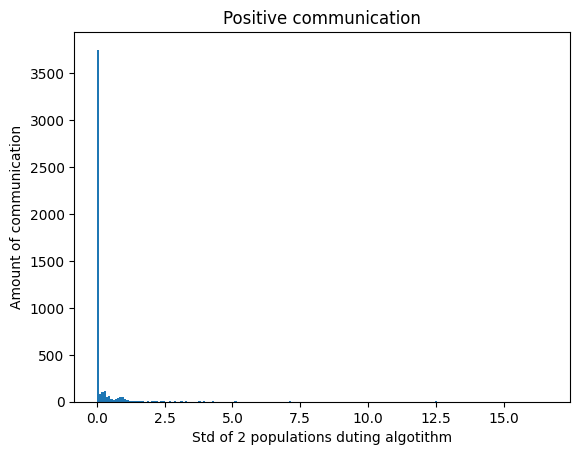

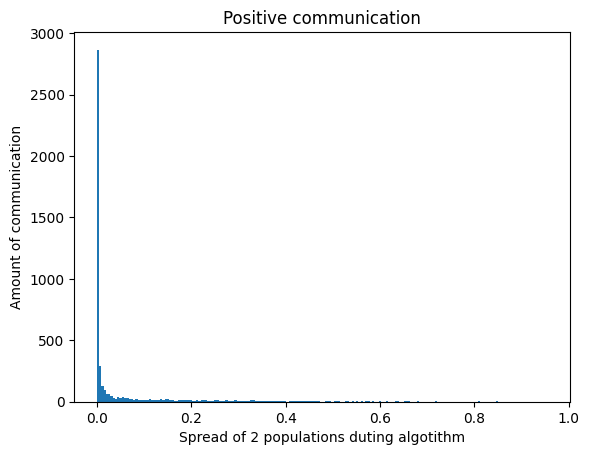

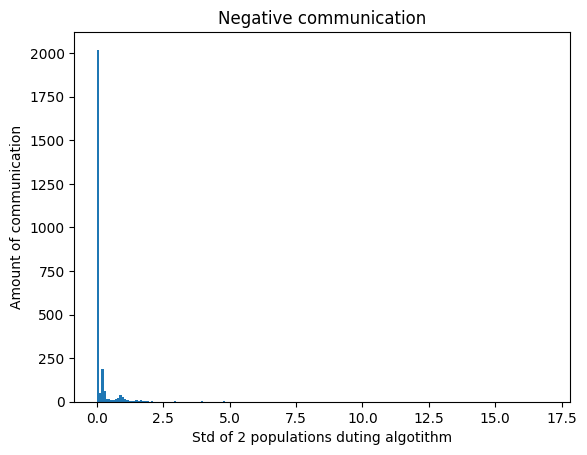

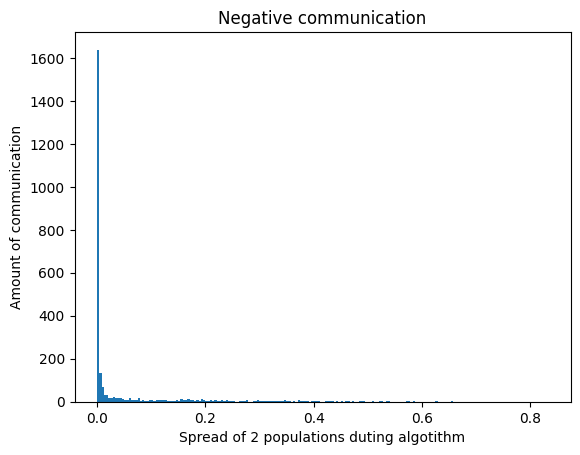

INFO:root:plotting finished in 0.07890942096710205
INFO:root:Run 0 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.850548450152079
INFO:root:comparison finished in 8.40842076142629
INFO:root:best socjo 0.04868776243074935 best single 0.018344680518666667


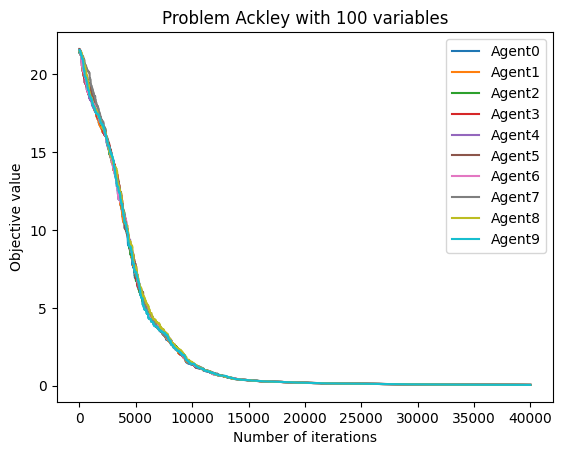

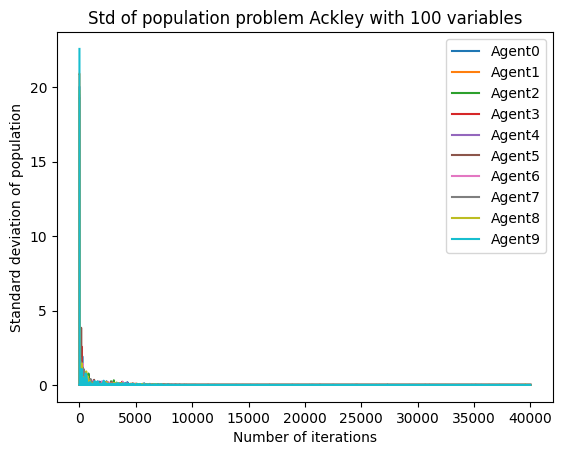

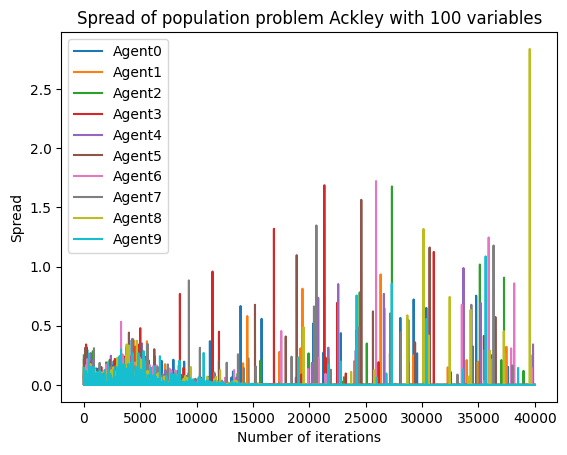

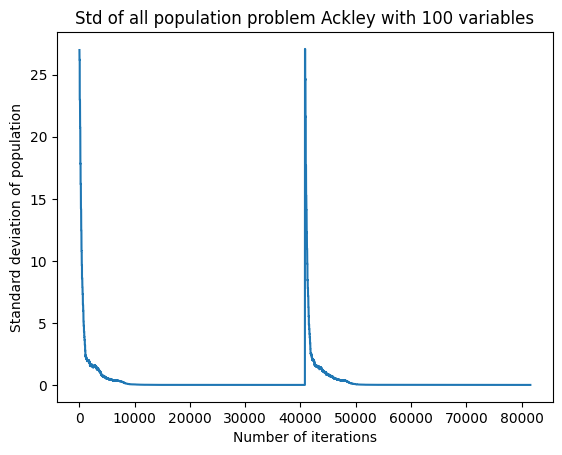

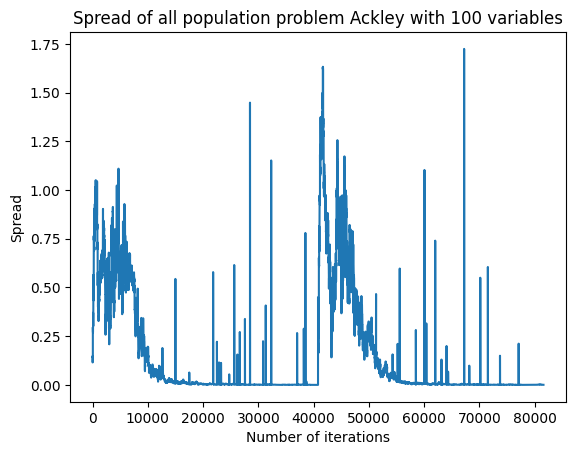

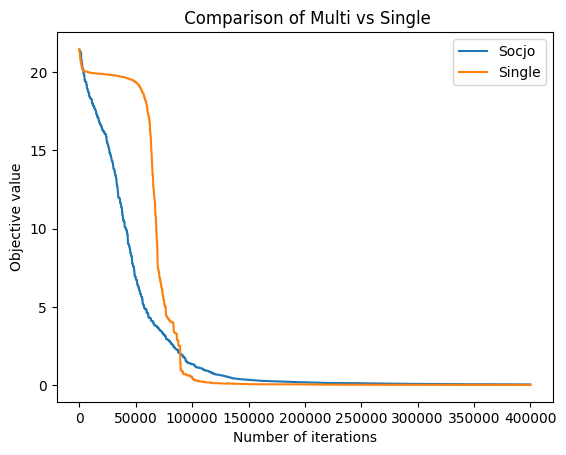

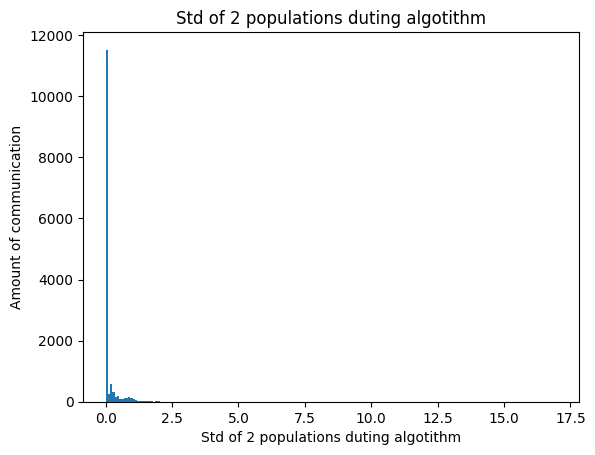

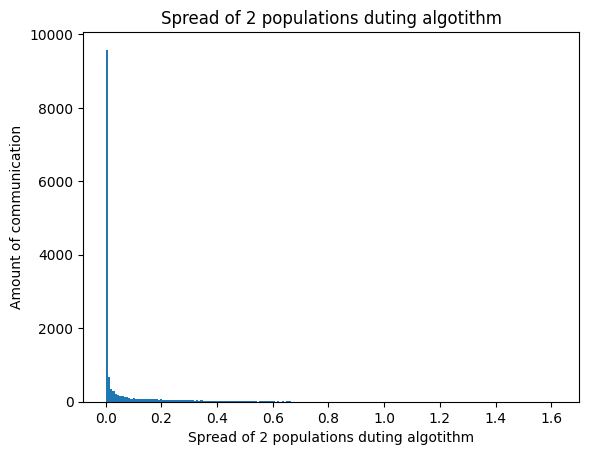

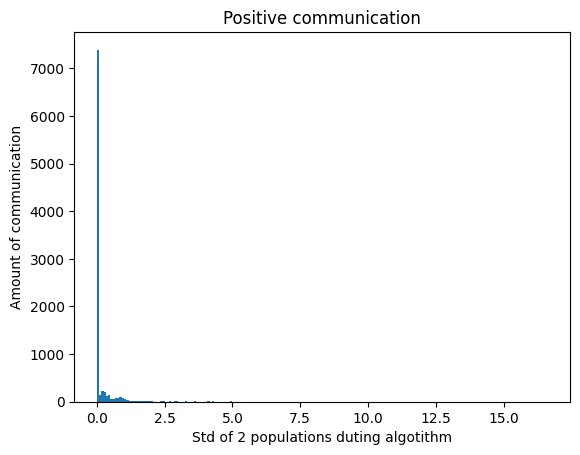

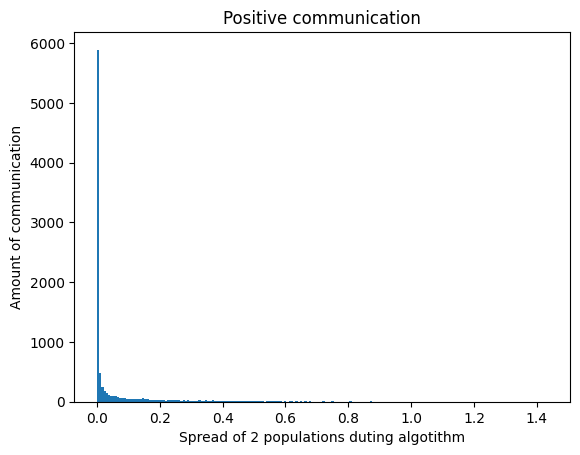

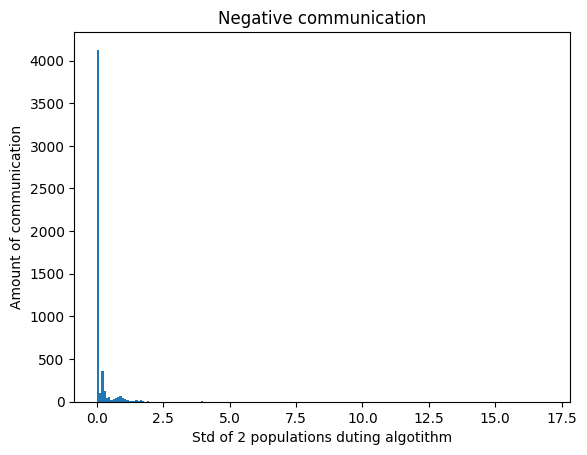

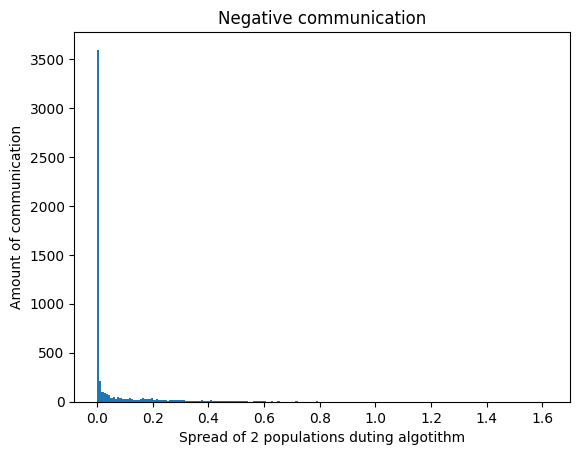

INFO:root:plotting finished in 0.07670916716257731
INFO:root:Run 1 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.848204890886942
INFO:root:comparison finished in 8.412508805592855
INFO:root:best socjo 0.04573662595066397 best single 0.015104177418451048


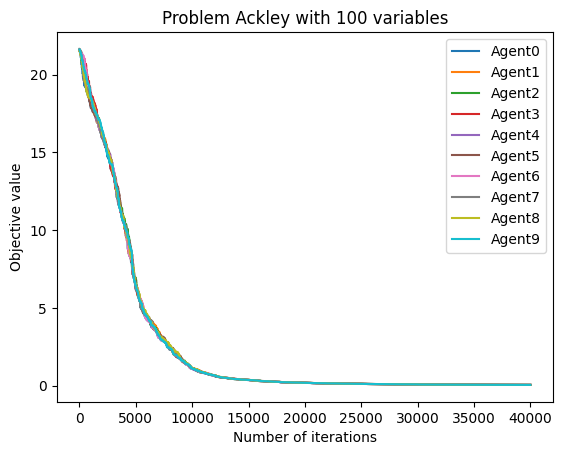

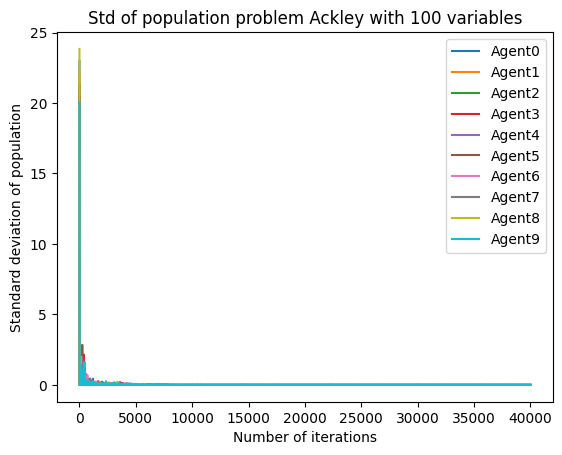

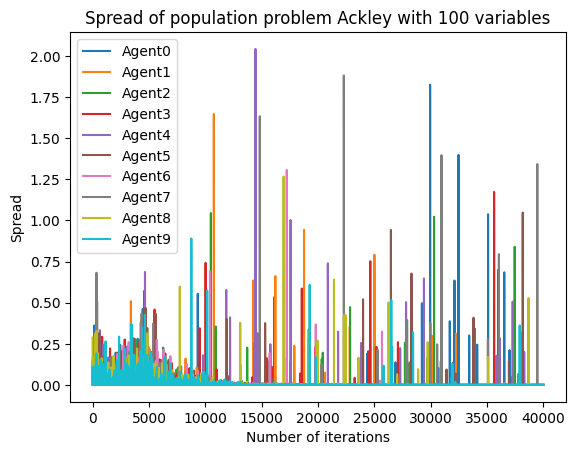

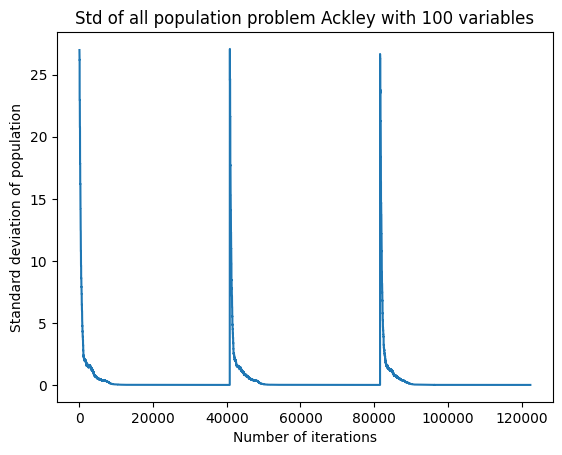

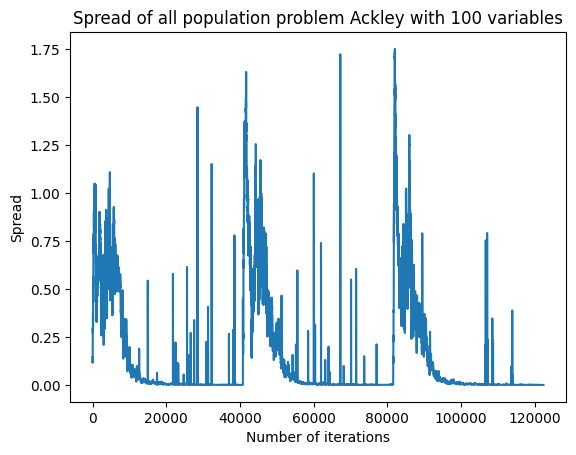

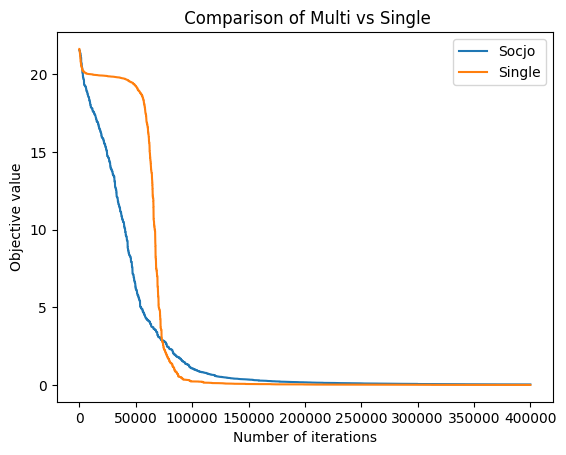

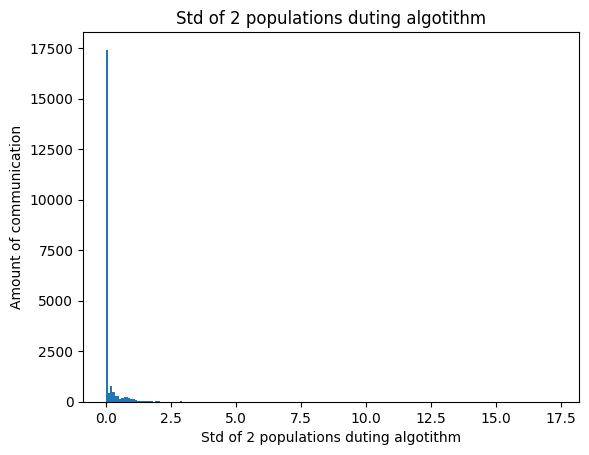

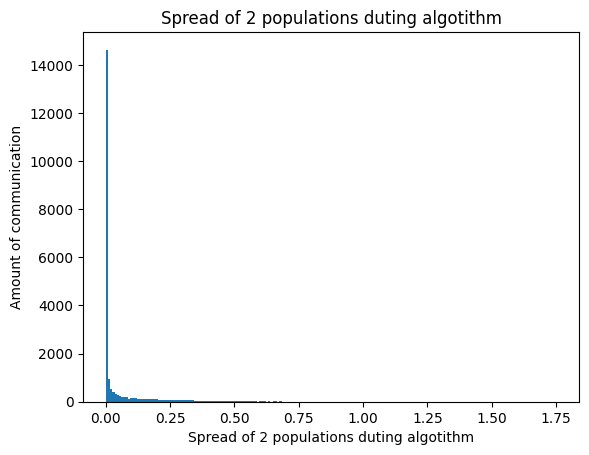

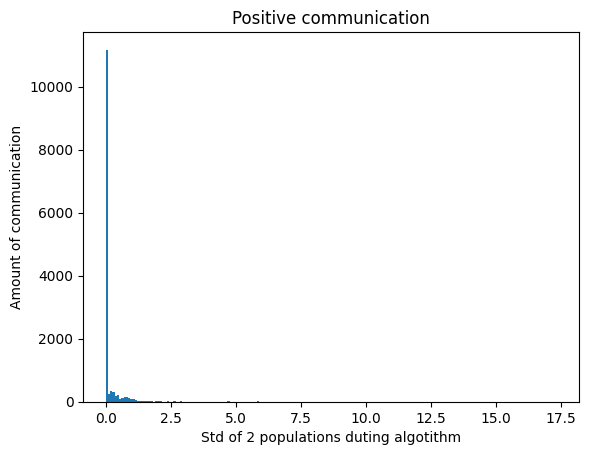

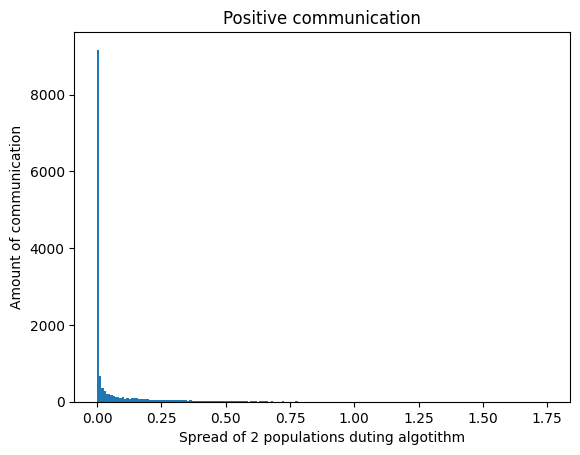

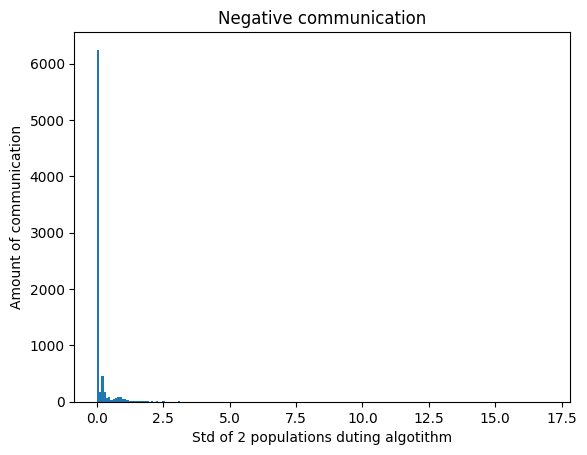

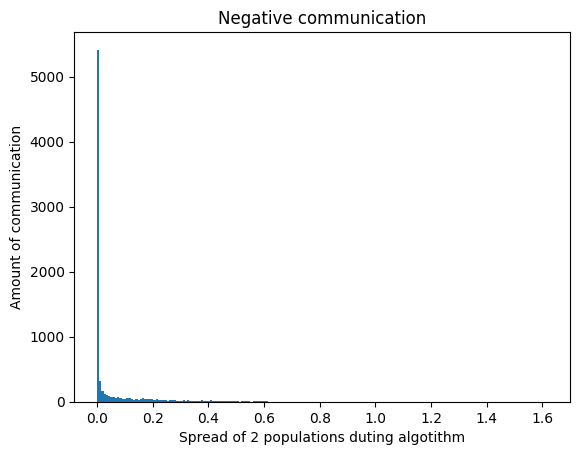

INFO:root:plotting finished in 0.08553685744603474
INFO:root:Run 2 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.872682428359985
INFO:root:comparison finished in 8.411986259619395
INFO:root:best socjo 0.04228314034378089 best single 0.016973923188477347


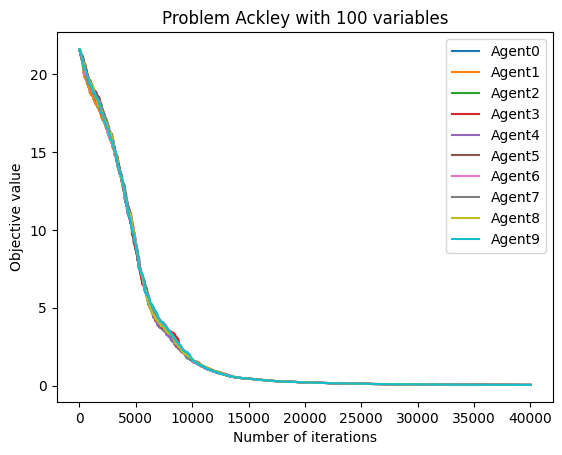

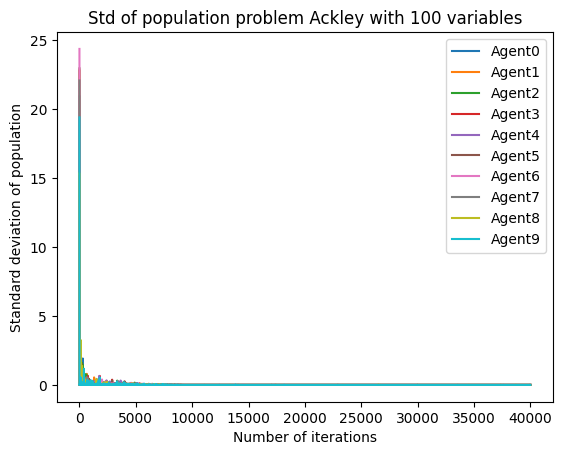

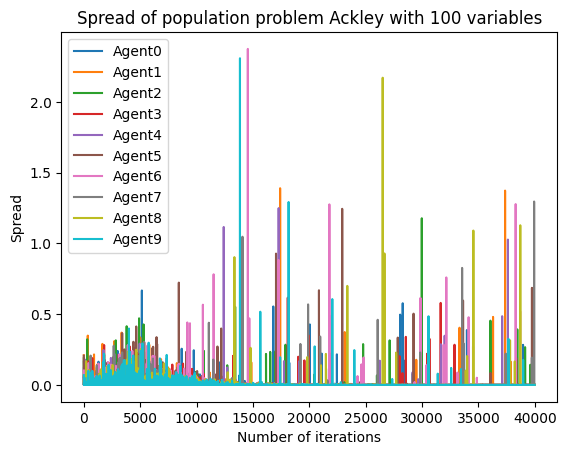

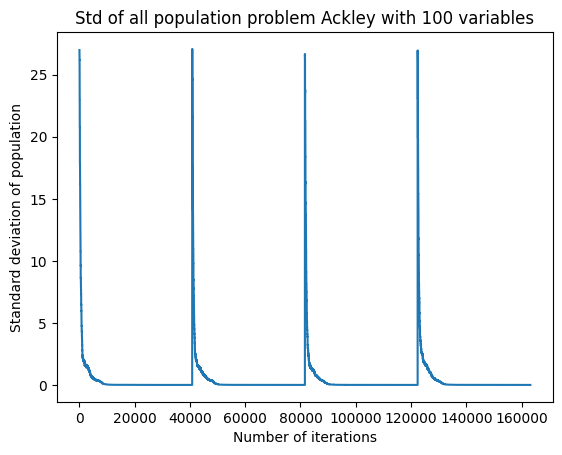

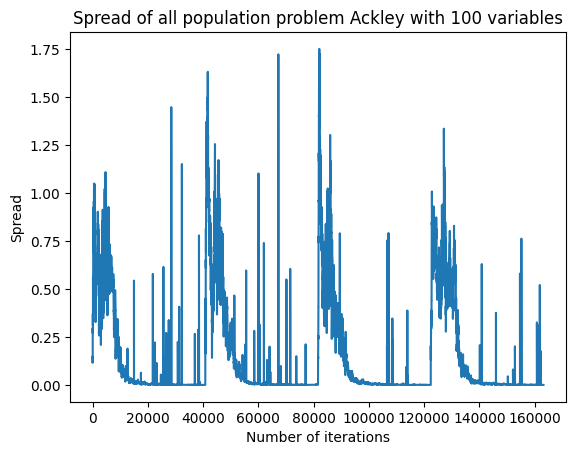

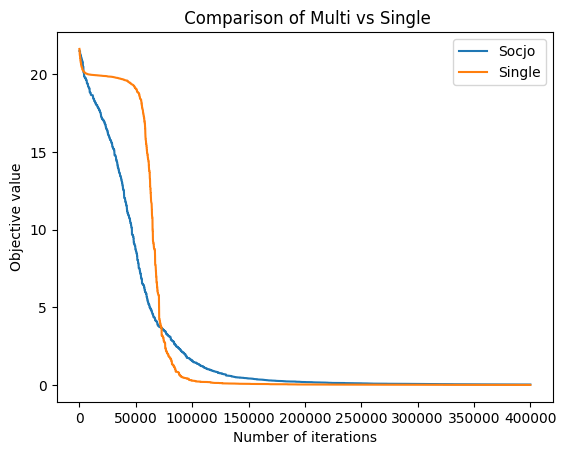

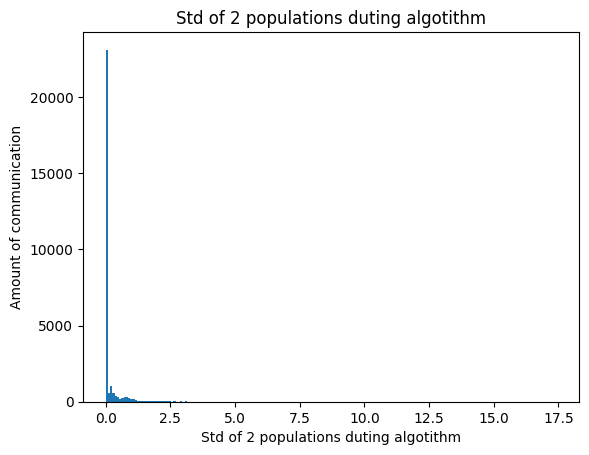

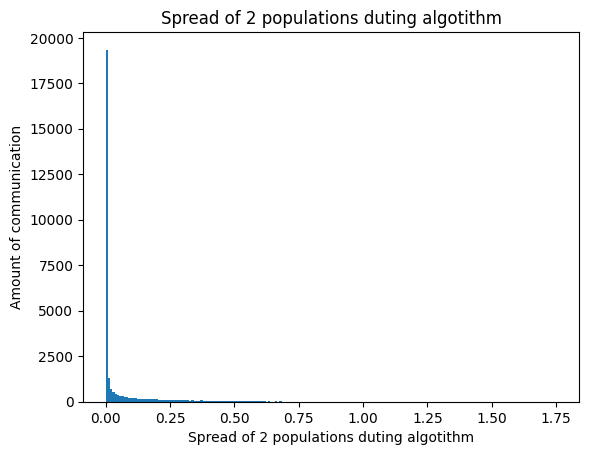

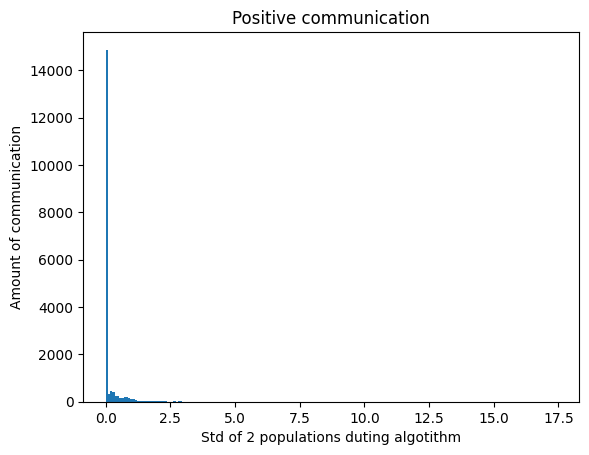

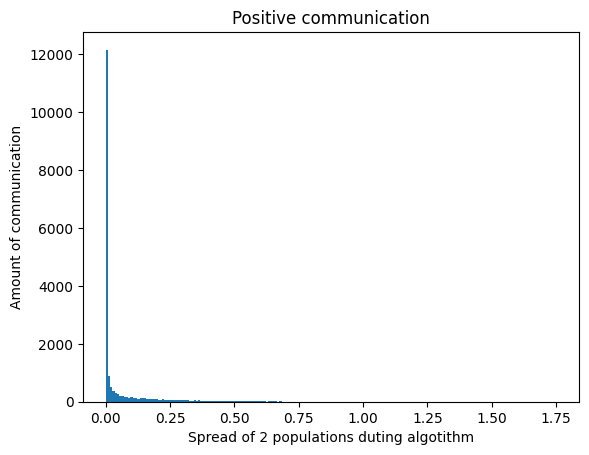

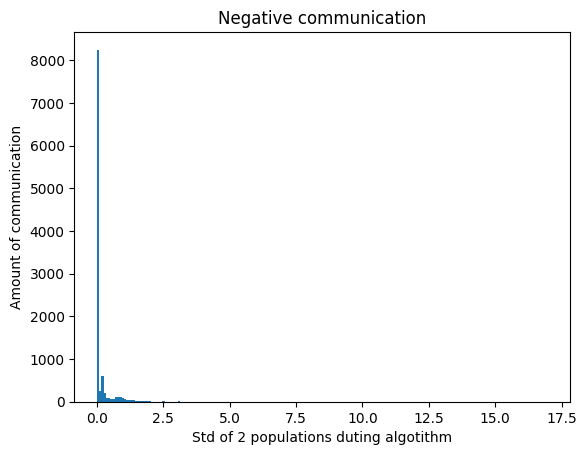

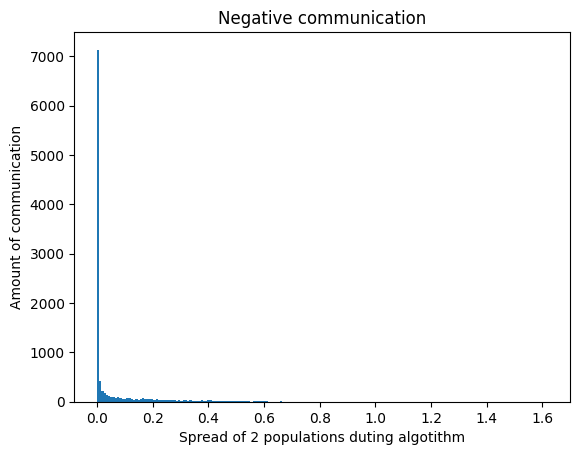

INFO:root:plotting finished in 0.08010045289993287
INFO:root:Run 3 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.875870172182719
INFO:root:comparison finished in 8.434820632139841
INFO:root:best socjo 0.051224294035475015 best single 0.018642009776439483


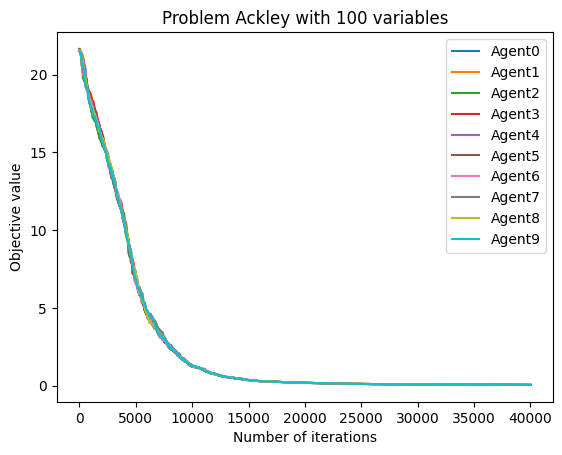

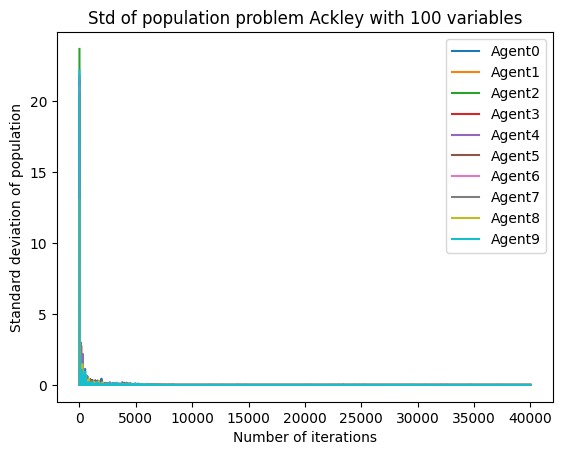

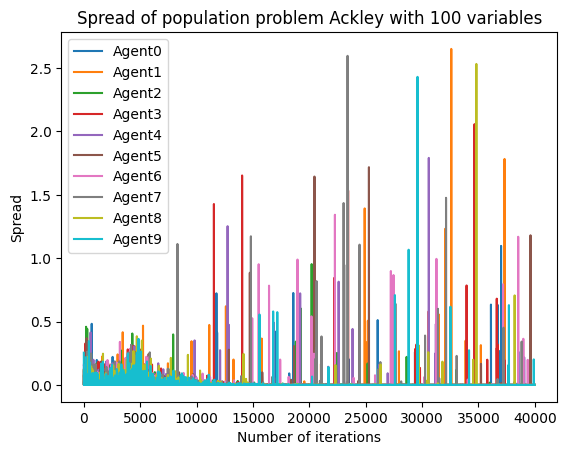

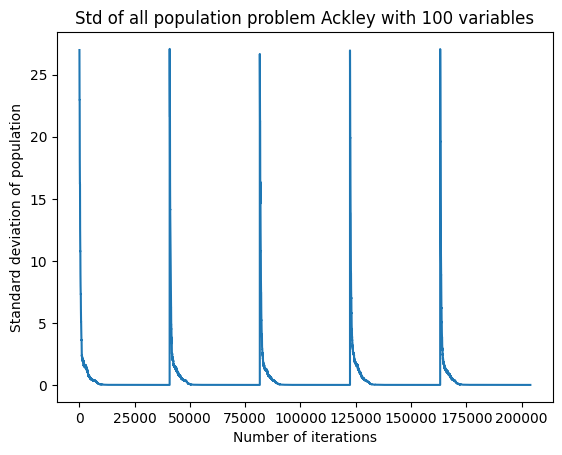

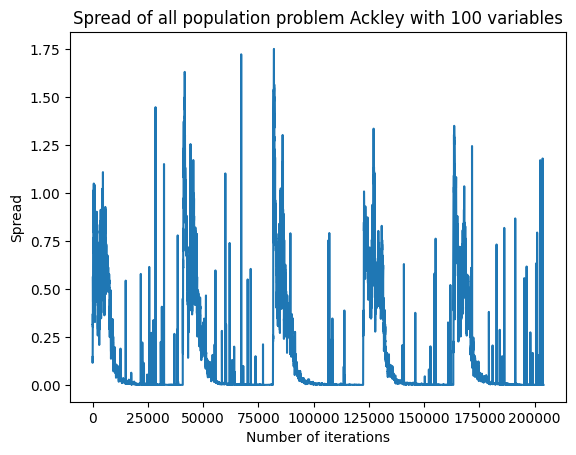

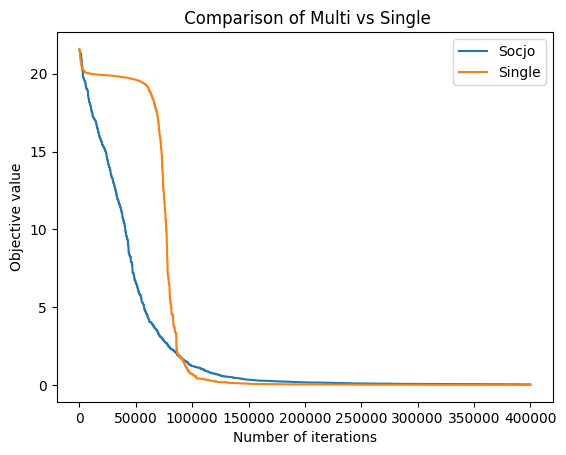

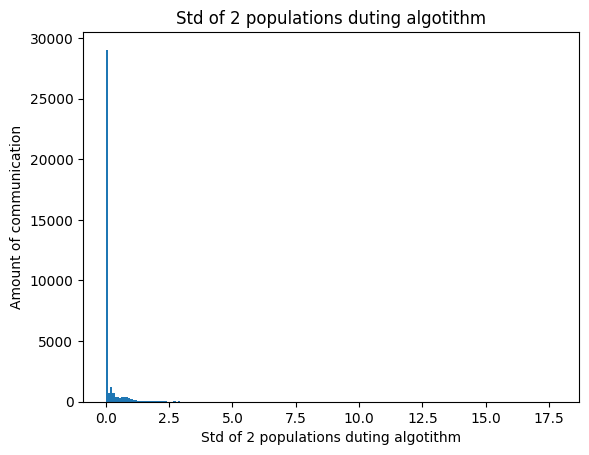

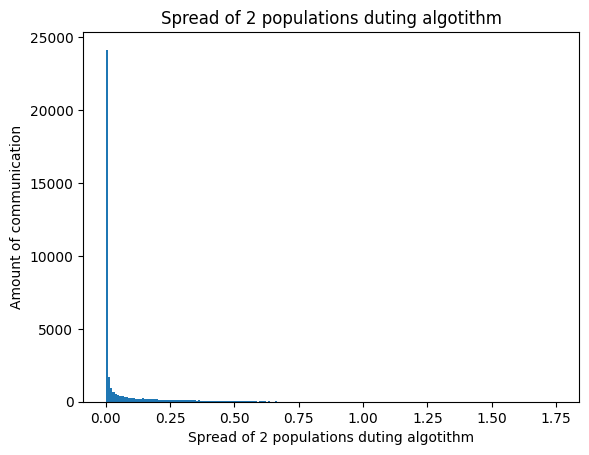

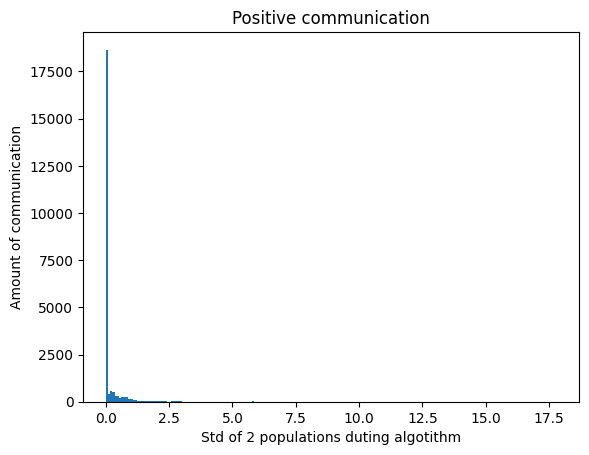

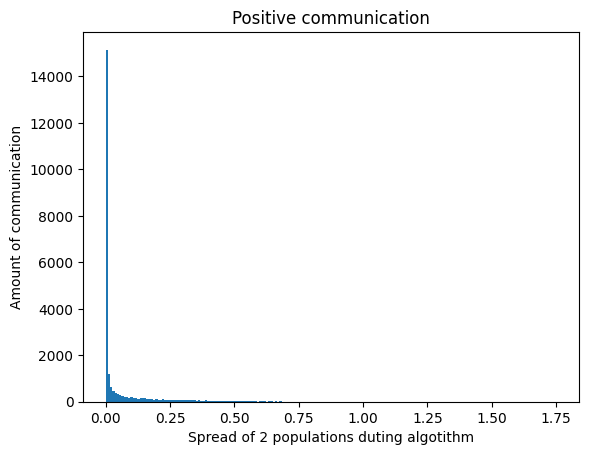

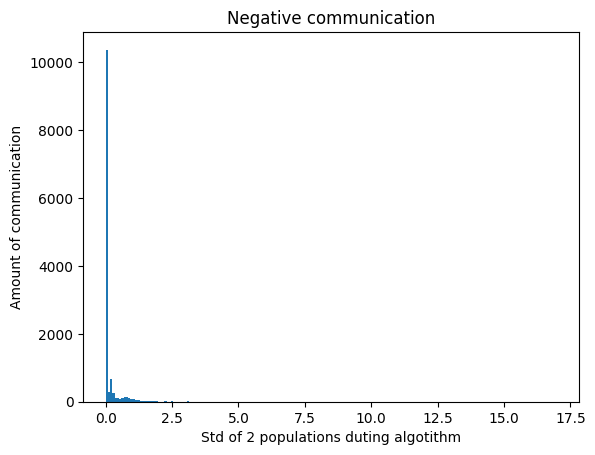

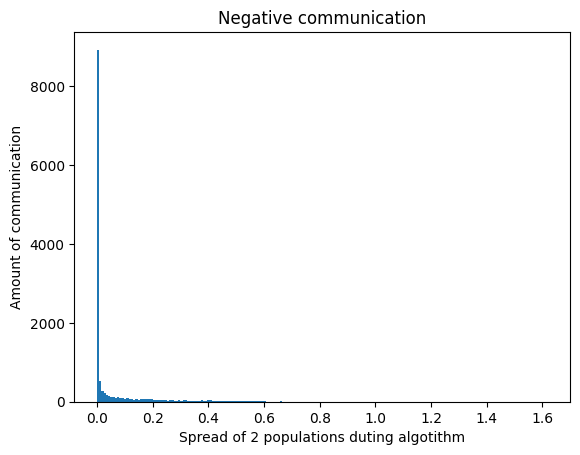

INFO:root:plotting finished in 0.09093864361445109
INFO:root:Run 4 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.893295518557231
INFO:root:comparison finished in 8.424063897132873
INFO:root:best socjo 0.0507661814274063 best single 0.02082985522105618


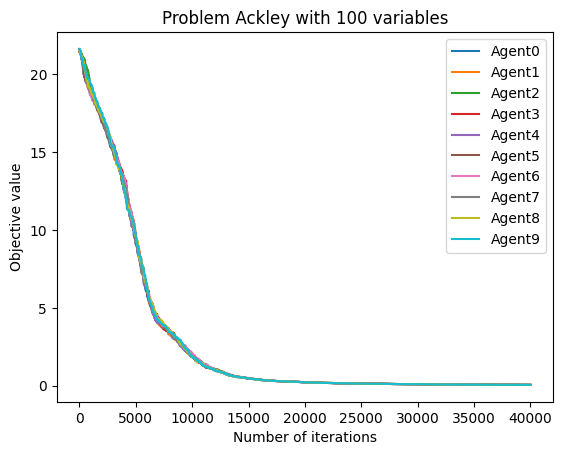

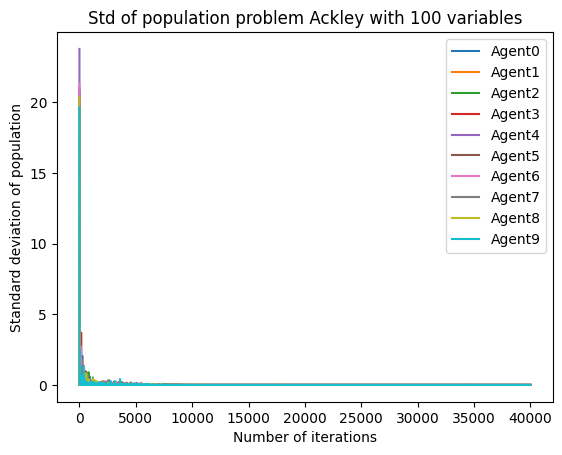

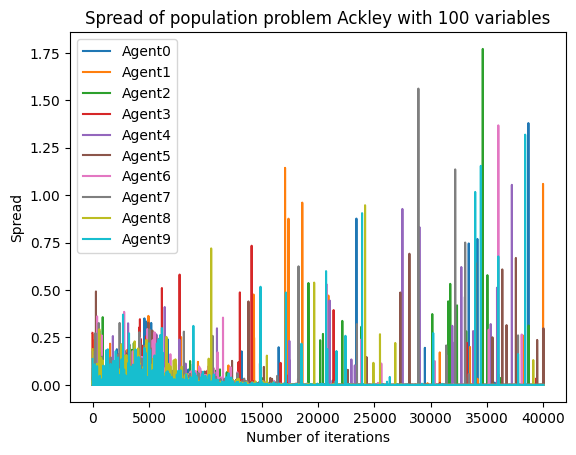

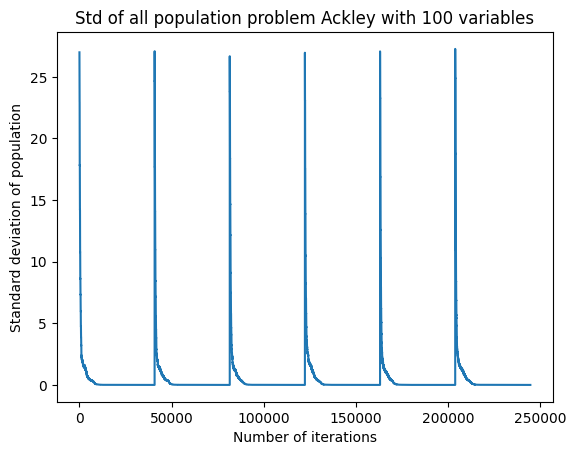

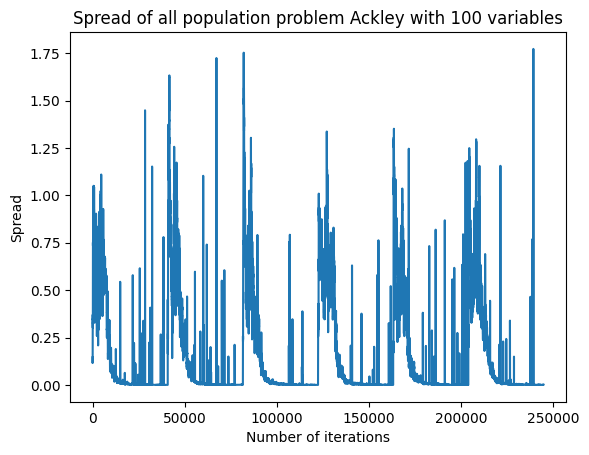

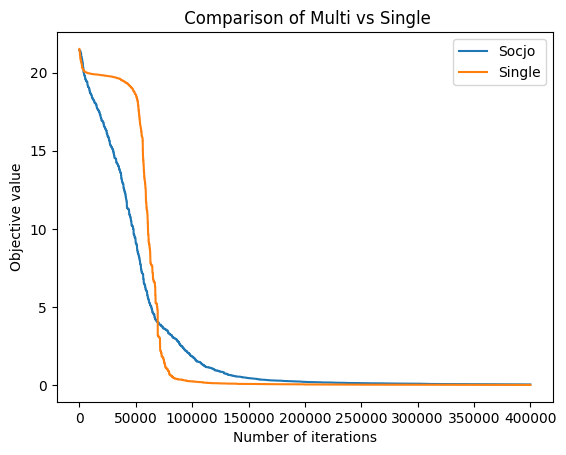

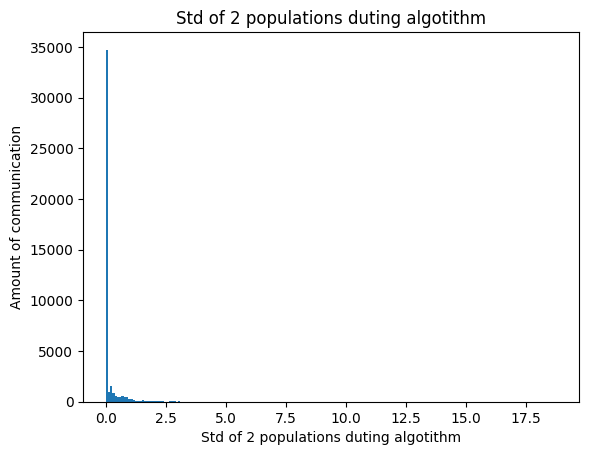

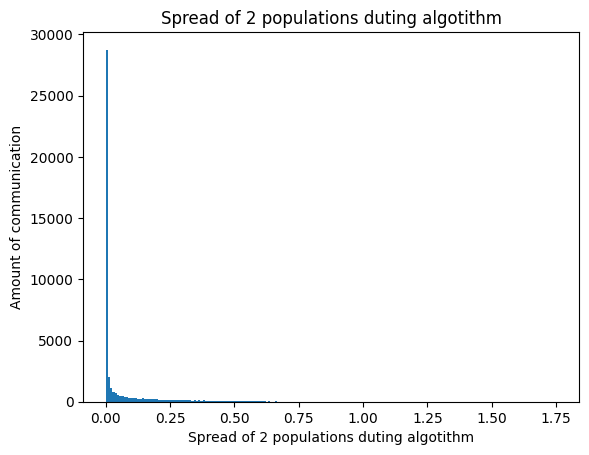

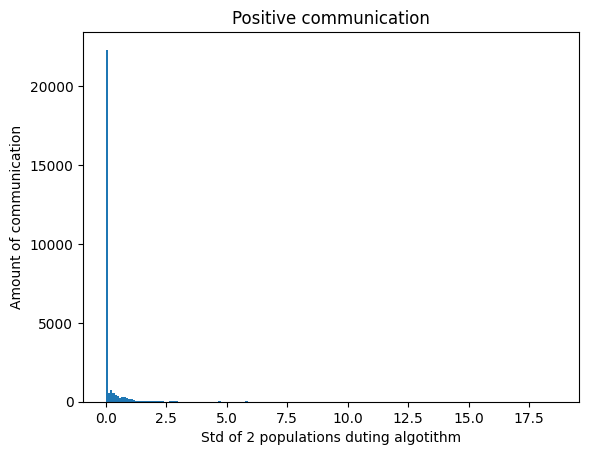

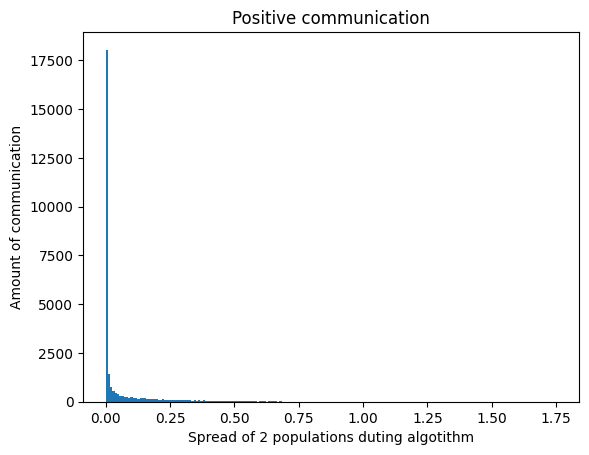

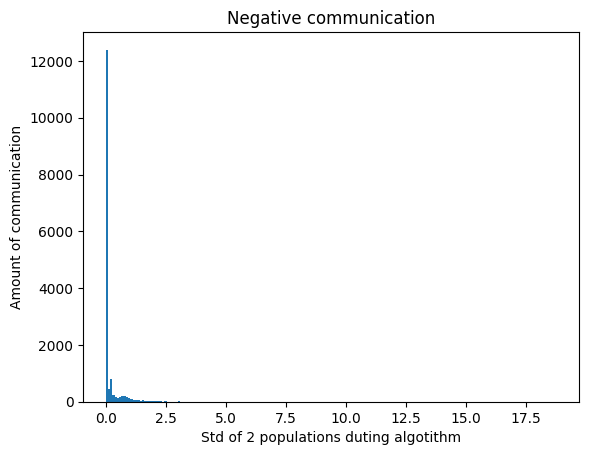

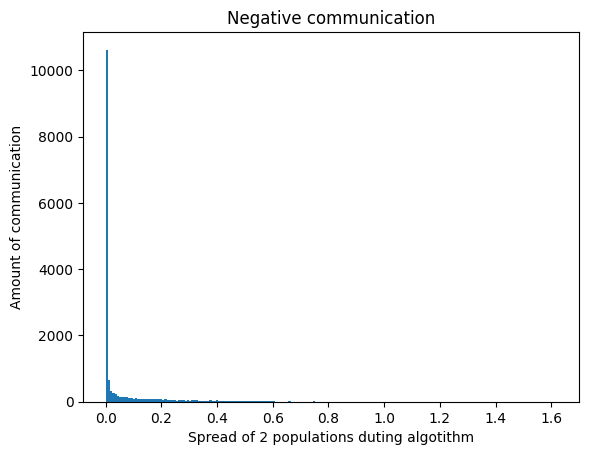

INFO:root:plotting finished in 0.09222244421641032
INFO:root:Run 5 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.845639101664226
INFO:root:comparison finished in 8.400893958409627
INFO:root:best socjo 0.04590610133026418 best single 0.018184103577958854


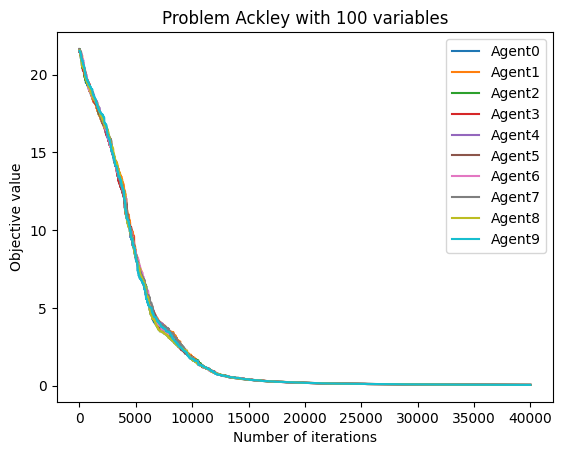

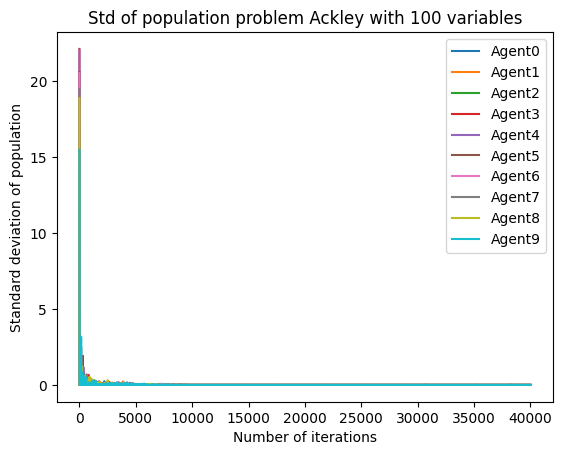

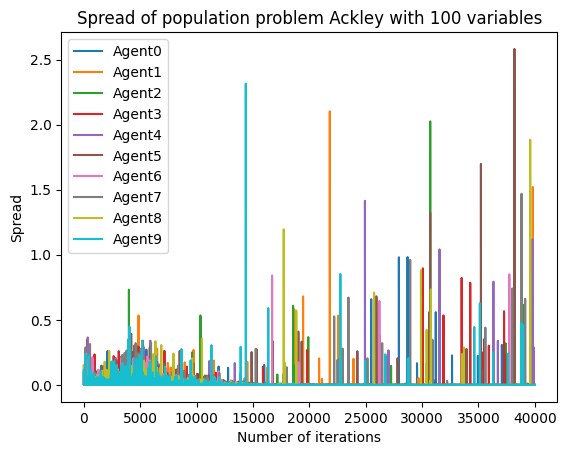

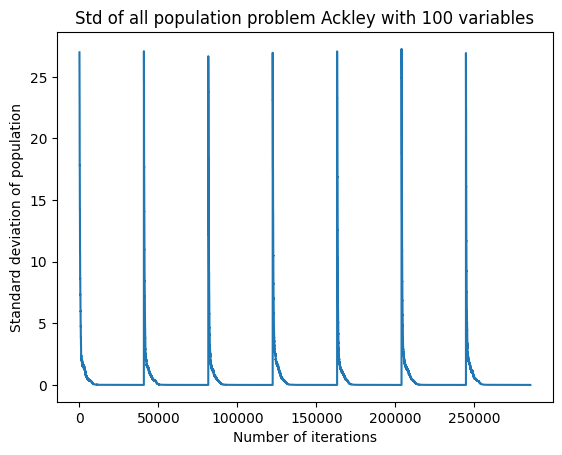

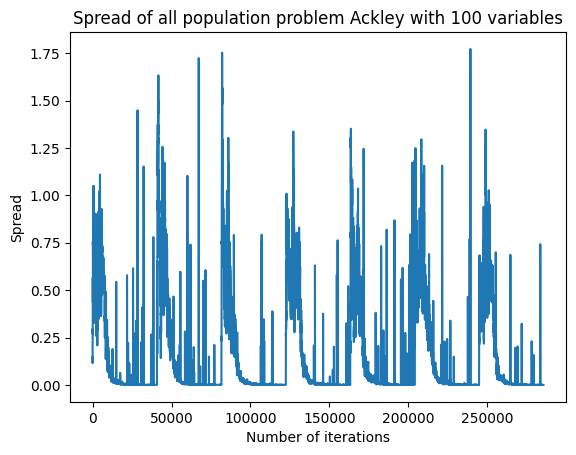

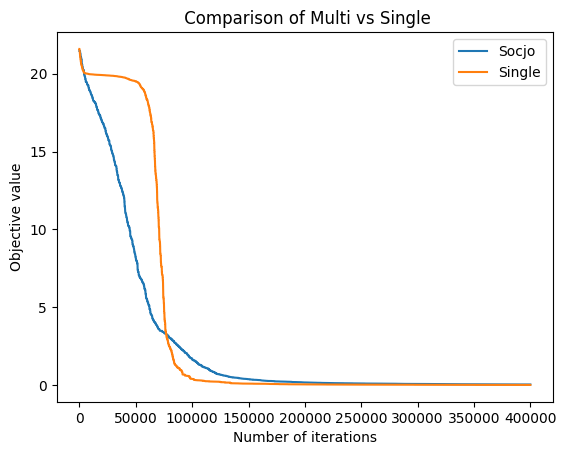

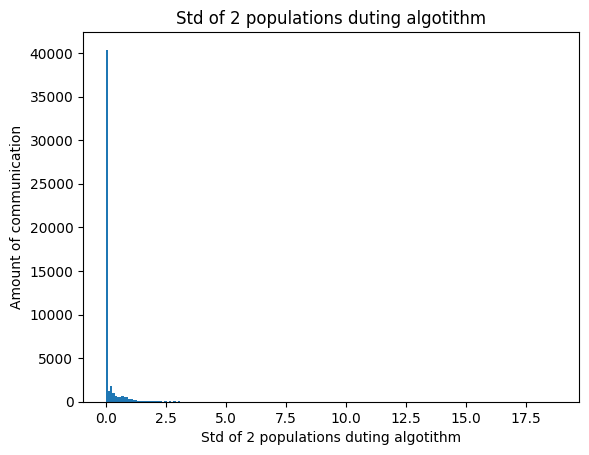

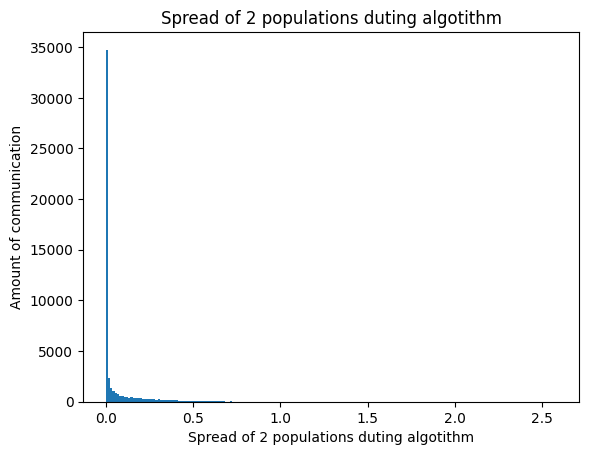

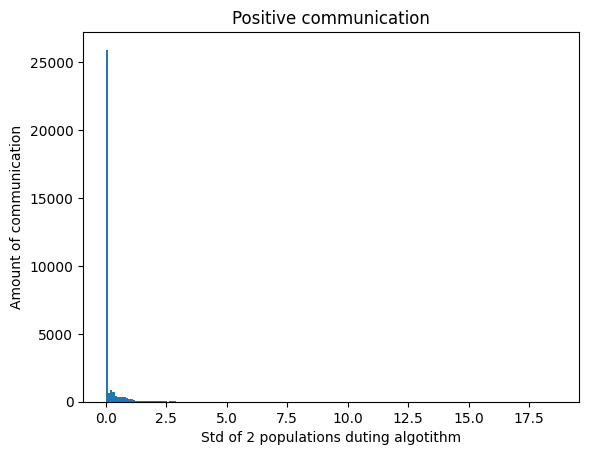

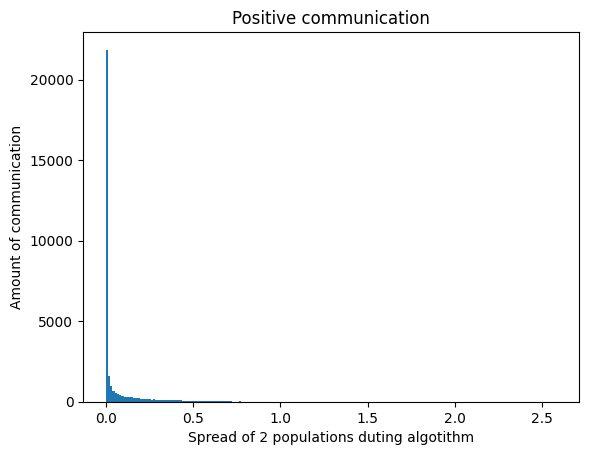

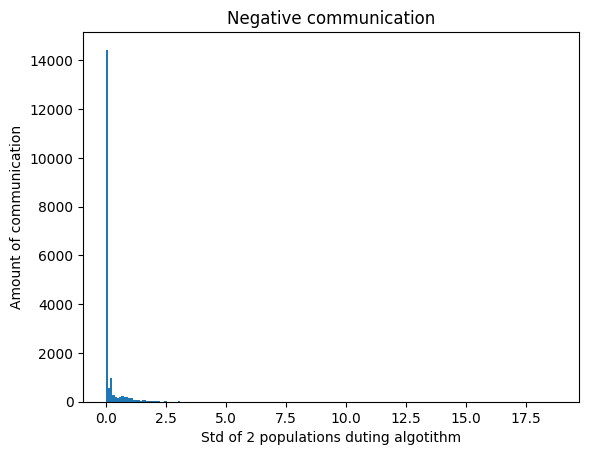

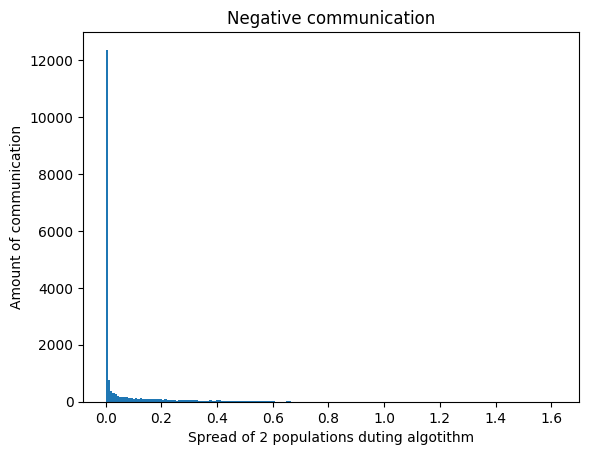

INFO:root:plotting finished in 0.08359566529591879
INFO:root:Run 6 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.856226988633473
INFO:root:comparison finished in 8.391066300868989
INFO:root:best socjo 0.04683483312235781 best single 0.020922851953237842


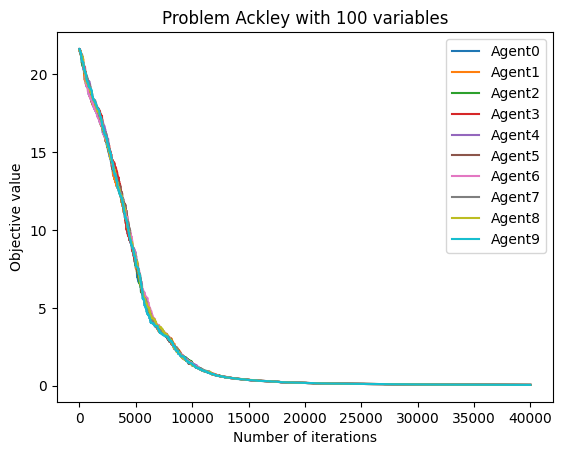

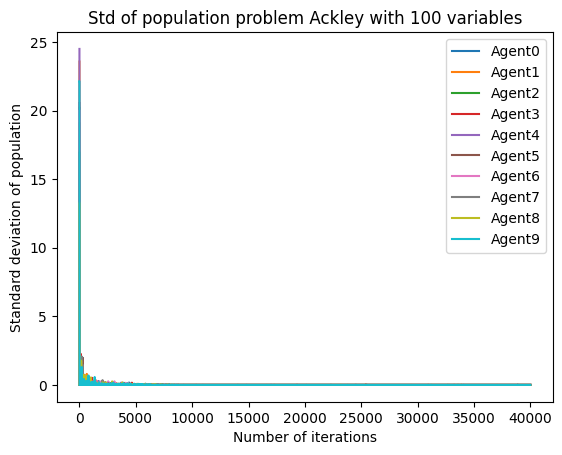

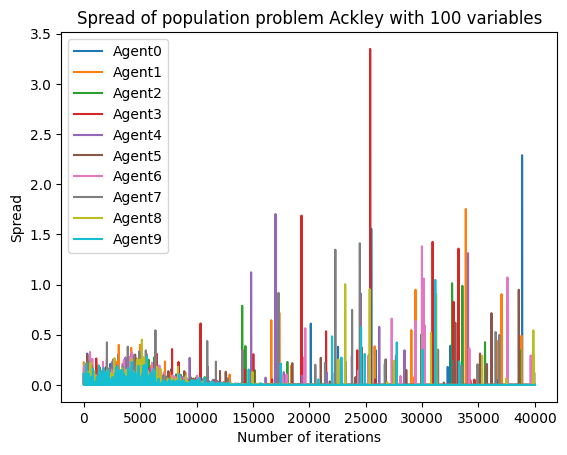

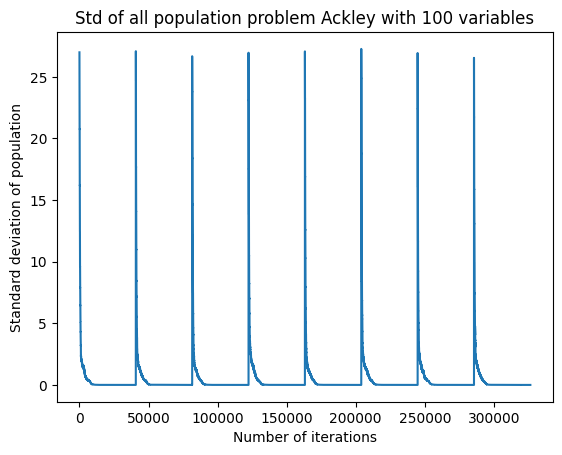

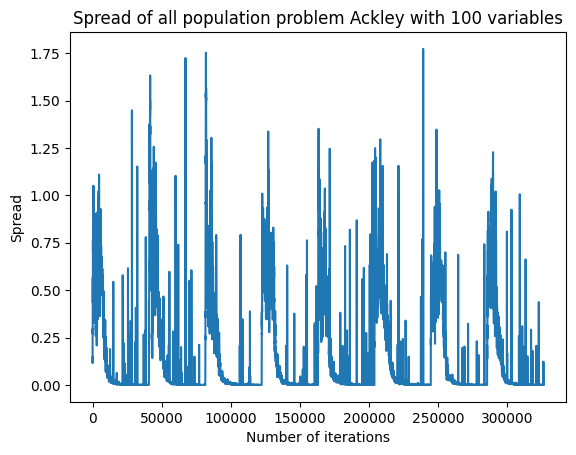

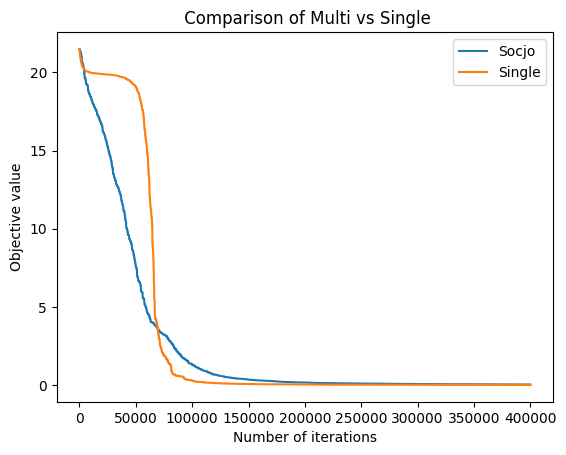

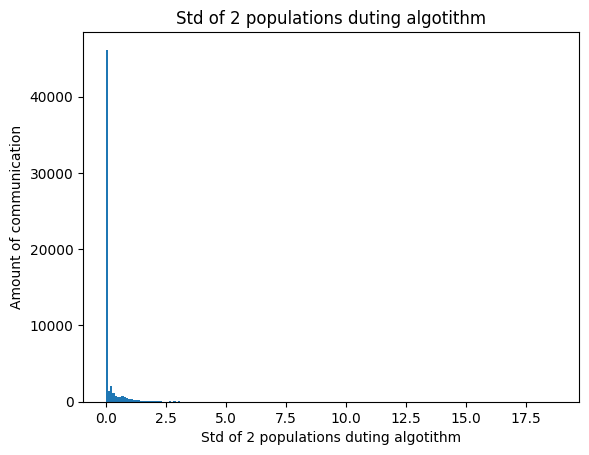

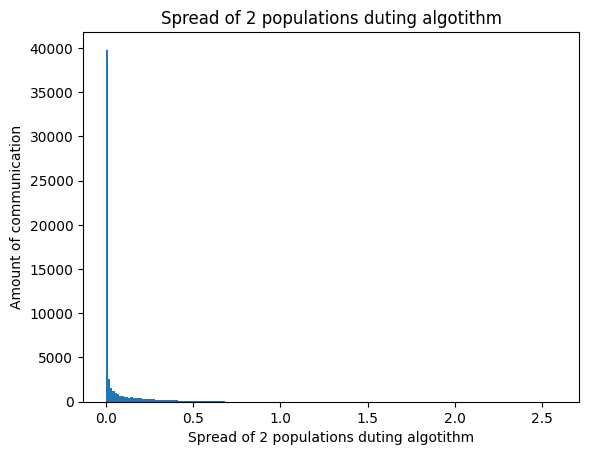

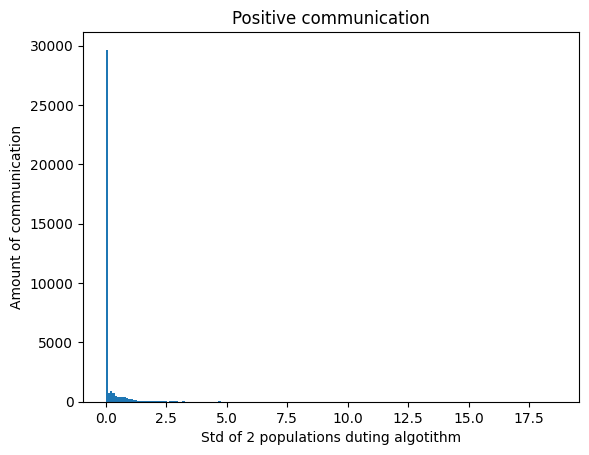

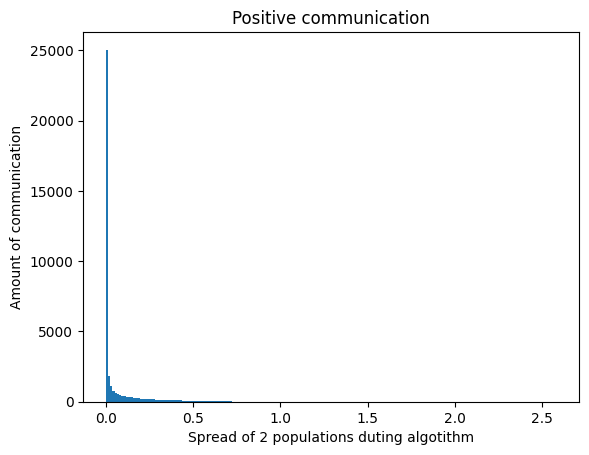

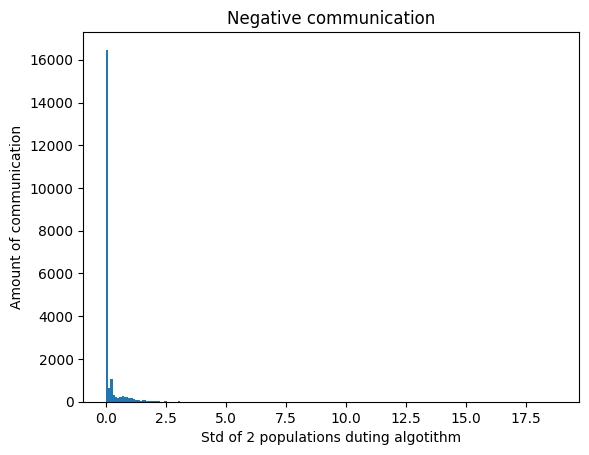

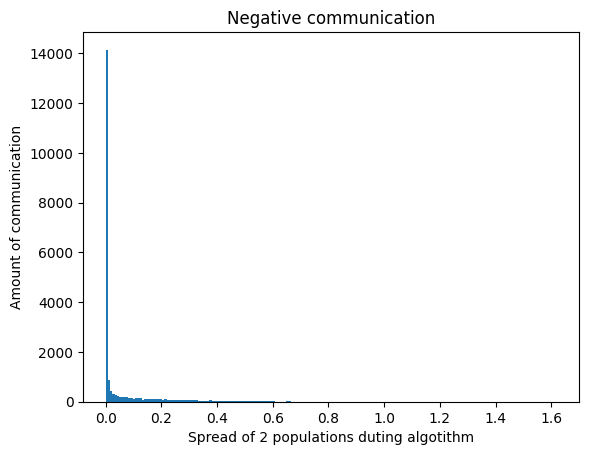

INFO:root:plotting finished in 0.09686731497446696
INFO:root:Run 7 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.873123602072399
INFO:root:comparison finished in 8.443345137437184
INFO:root:best socjo 0.049986927230009304 best single 0.014511363054886761


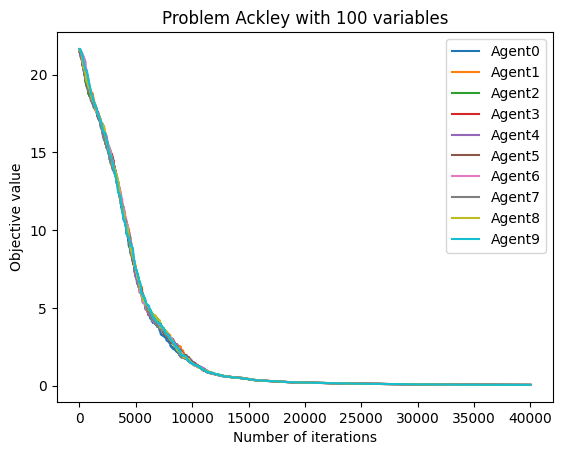

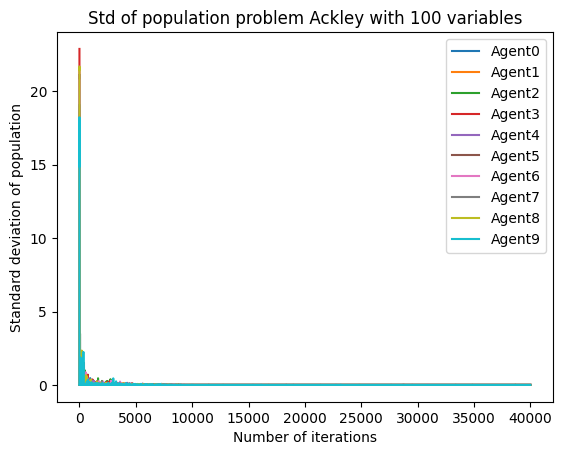

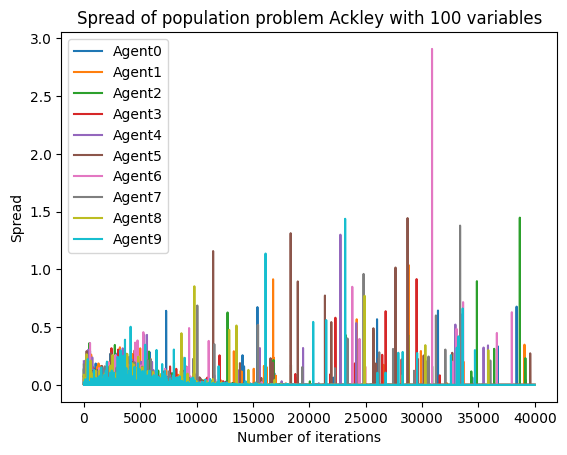

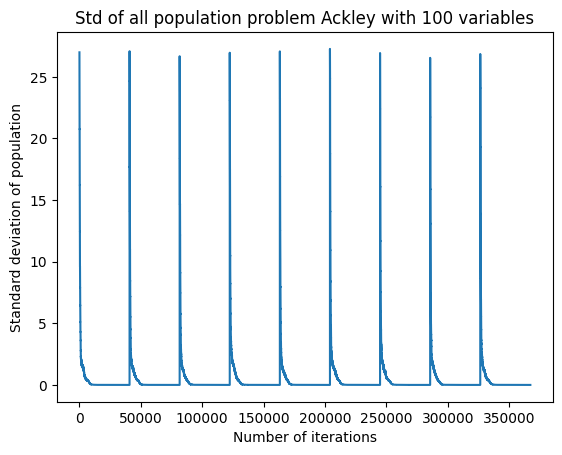

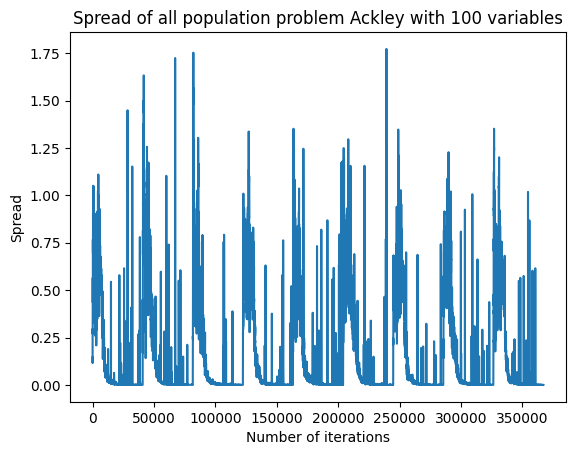

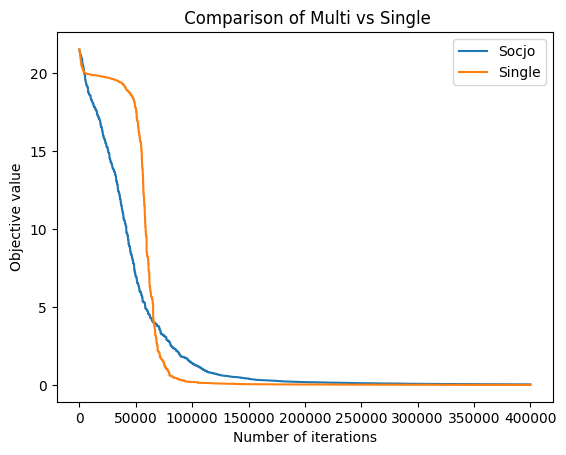

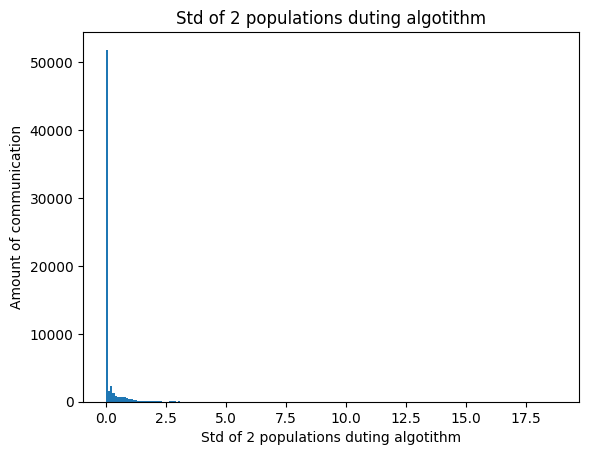

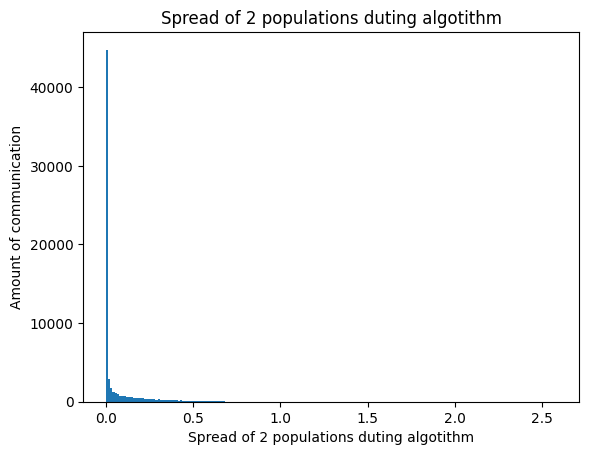

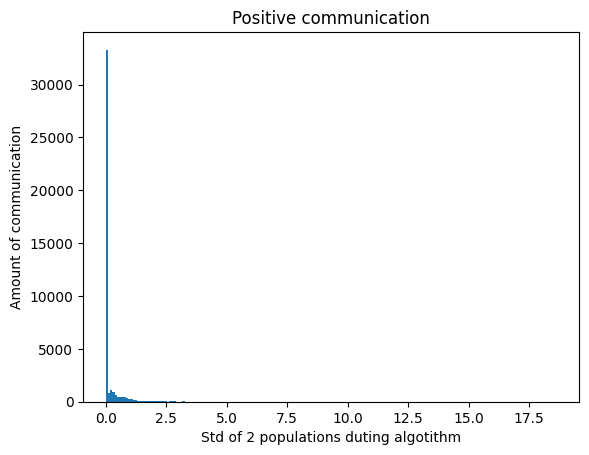

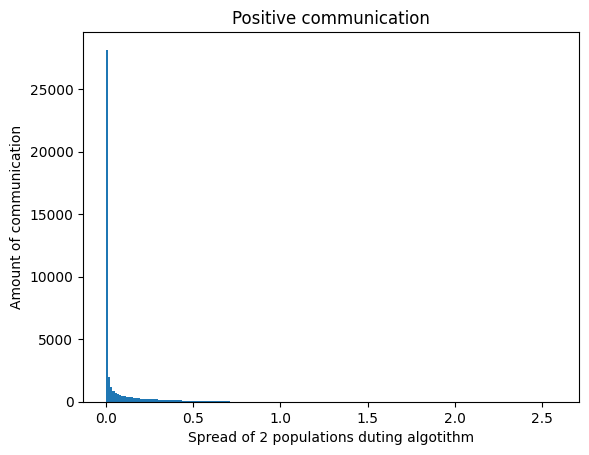

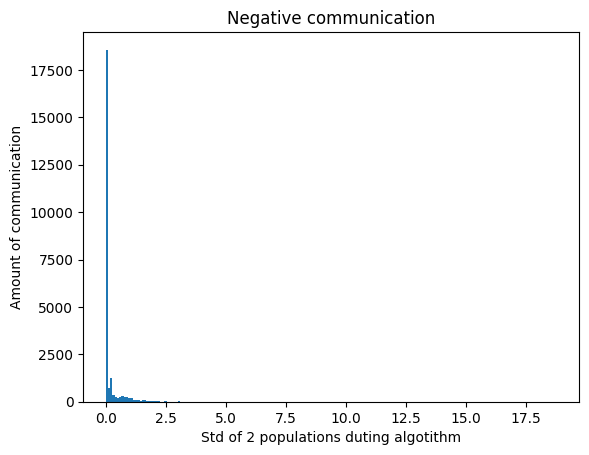

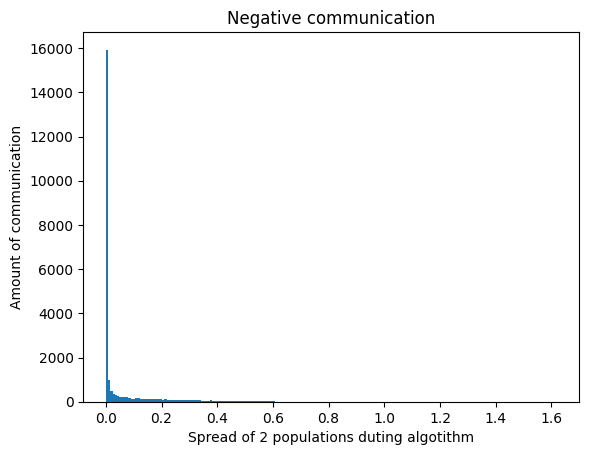

INFO:root:plotting finished in 0.08814959128697714
INFO:root:Run 8 out of 10
INFO:root:Socjo started
INFO:root:Socjo finished in 8.938399203618367
INFO:root:comparison finished in 8.447523840268452
INFO:root:best socjo 0.03737930817835933 best single 0.01771809215213027


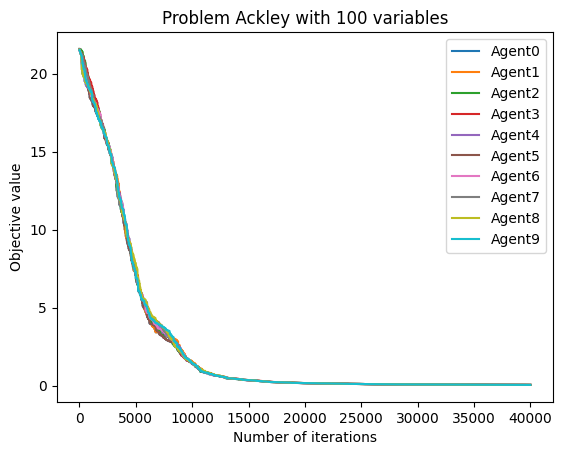

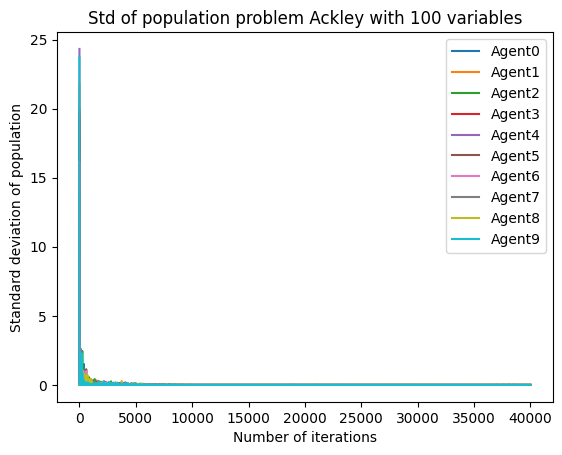

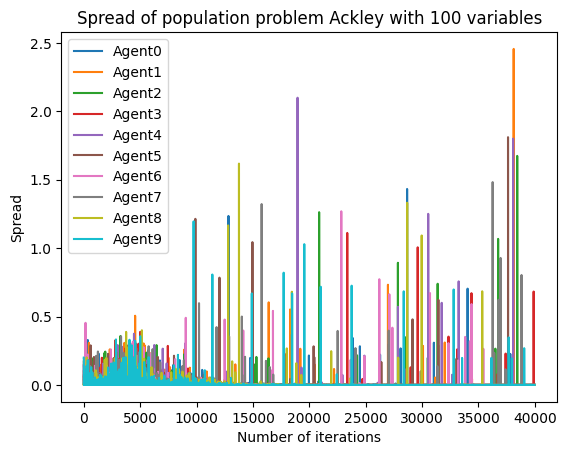

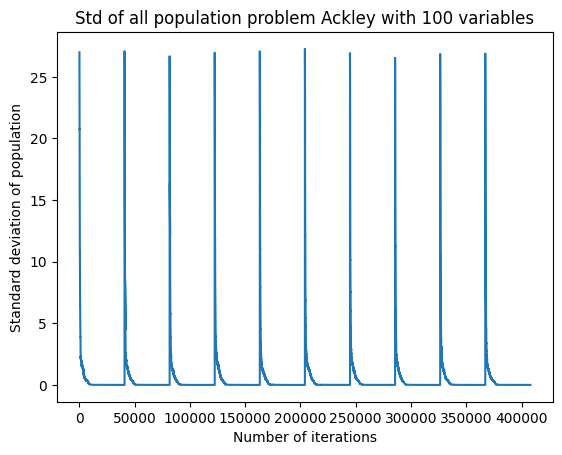

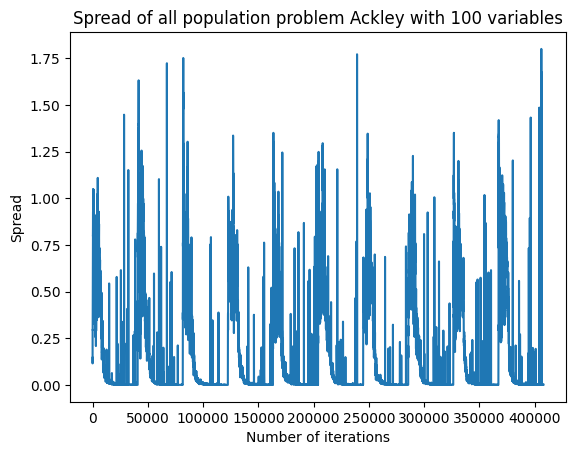

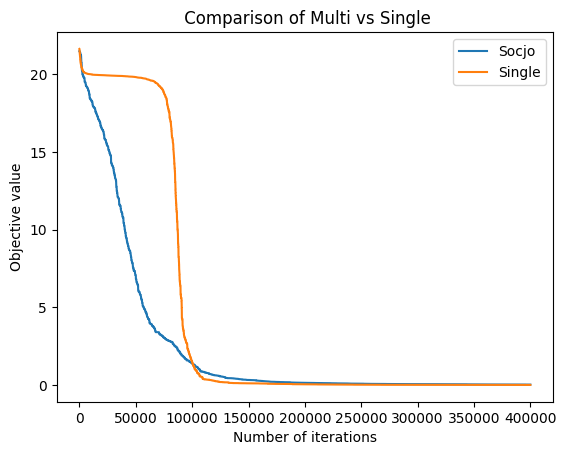

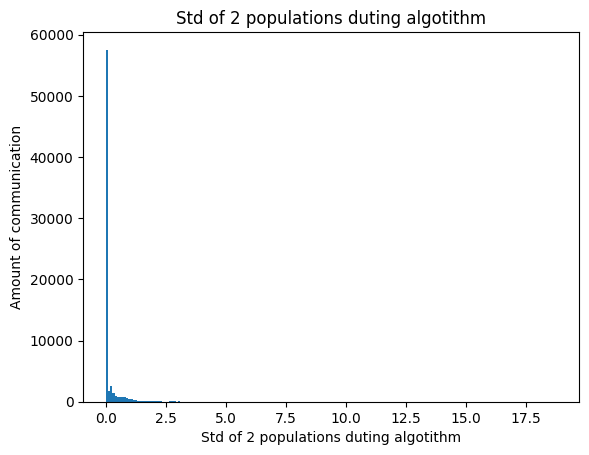

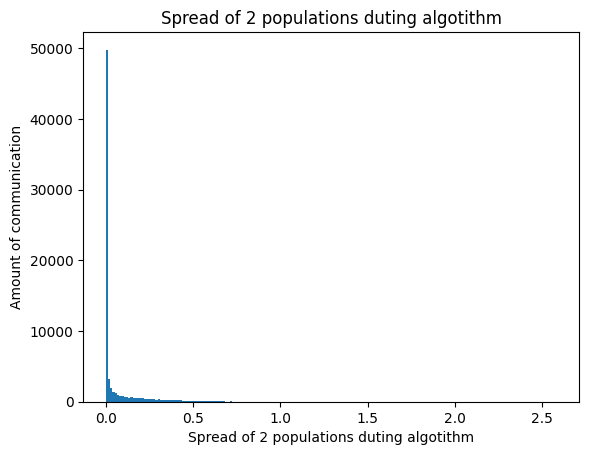

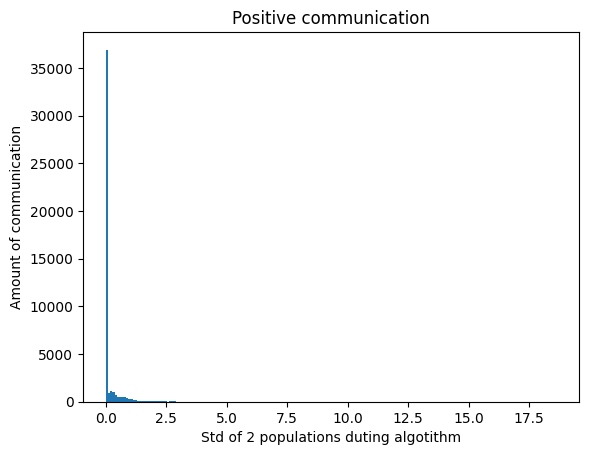

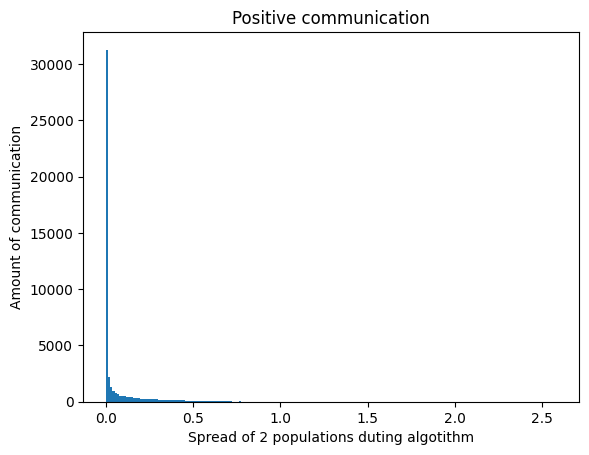

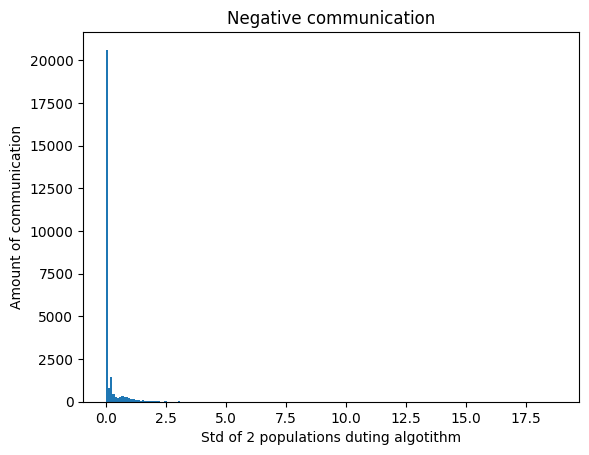

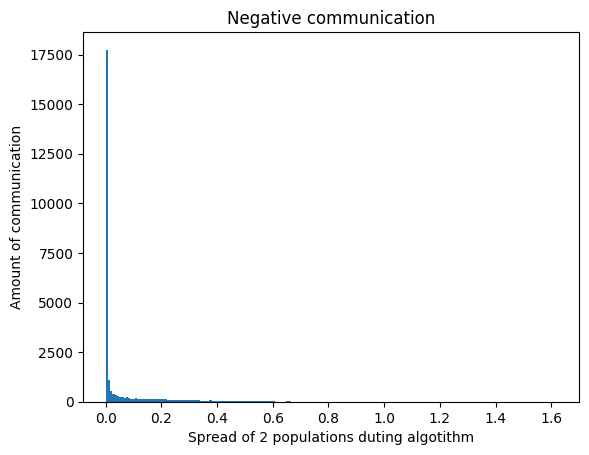

INFO:root:plotting finished in 0.09102191527684529
INFO:root:Run 9 out of 10


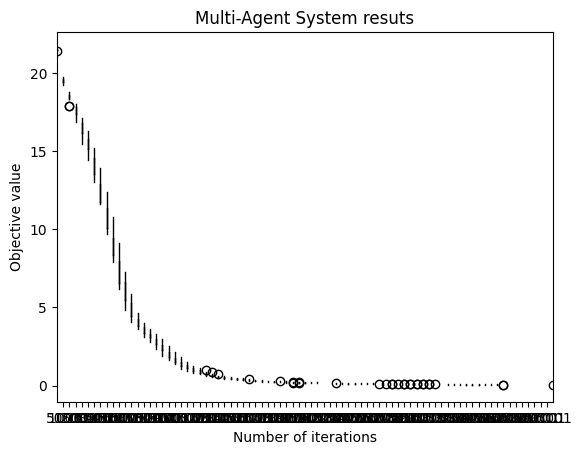

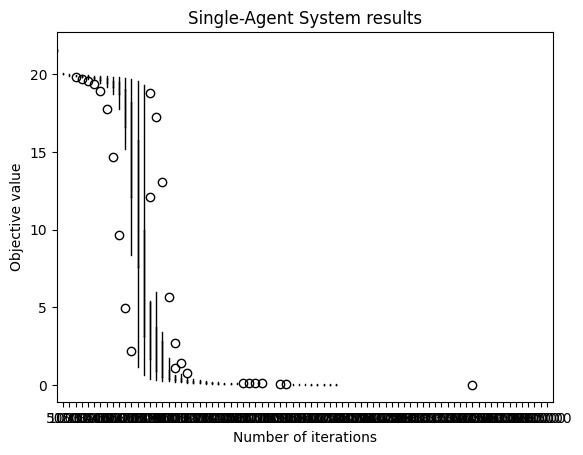

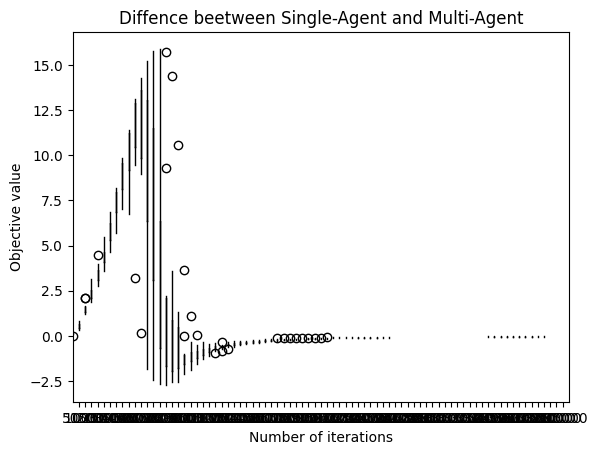

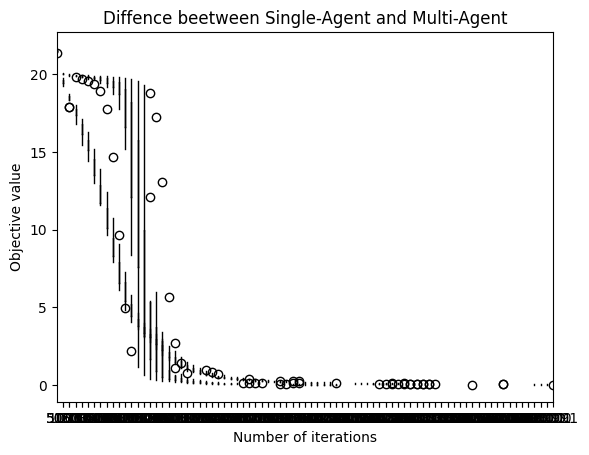

INFO:root:endoced
INFO:root:{'x_coor_multi': '[[1, 5001, 10001, 15001, 20001, 25001, 30001, 35001, 40001, 45001, 50001, 55001, 60001, 65001, 70001, 75001, 80001, 85001, 90001, 95001, 100001, 105001, 110001, 115001, 120001, 125001, 130001, 135001, 140001, 145001, 150001, 155001, 160001, 165001, 170001, 175001, 180001, 185001, 190001, 195001, 200001, 205001, 210001, 215001, 220001, 225001, 230001, 235001, 240001, 245001, 250001, 255001, 260001, 265001, 270001, 275001, 280001, 285001, 290001, 295001, 300001, 305001, 310001, 315001, 320001, 325001, 330001, 335001, 340001, 345001, 350001, 355001, 360001, 365001, 370001, 375001, 380001, 385001, 390001, 395001, 399991], [1, 5001, 10001, 15001, 20001, 25001, 30001, 35001, 40001, 45001, 50001, 55001, 60001, 65001, 70001, 75001, 80001, 85001, 90001, 95001, 100001, 105001, 110001, 115001, 120001, 125001, 130001, 135001, 140001, 145001, 150001, 155001, 160001, 165001, 170001, 175001, 180001, 185001, 190001, 195001, 200001, 205001, 210001, 215001, 

In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time
NUM_OF_COMM = 1
time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_R.json","config_A.json", "config_G.json"][1:2]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    config.noAgents = 10  
    iterations = config.problem.number_of_variables *100 * (40-(idx*18)) 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 10, cycles=int(iterations/50/config.noAgents) , cycle_iter=50, num_of_comm=NUM_OF_COMM)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()
    Statistic_runner_list[idx].save_progres(config = config, num_of_comm  =NUM_OF_COMM )

In [2]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i*1000:(i+1)*1000]))
        print(f"{i*1000} - {(i+1)*1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")


0 - 1000 nr komunikacji pozytywna 700 negatyna 300
1000 - 2000 nr komunikacji pozytywna 603 negatyna 397
2000 - 3000 nr komunikacji pozytywna 707 negatyna 293
3000 - 4000 nr komunikacji pozytywna 687 negatyna 313
4000 - 5000 nr komunikacji pozytywna 614 negatyna 386
5000 - 6000 nr komunikacji pozytywna 626 negatyna 374
6000 - 7000 nr komunikacji pozytywna 576 negatyna 424
7000 - 8000 nr komunikacji pozytywna 659 negatyna 341
8000 - 9000 nr komunikacji pozytywna 604 negatyna 396
9000 - 10000 nr komunikacji pozytywna 715 negatyna 285
10000 - 11000 nr komunikacji pozytywna 651 negatyna 349
11000 - 12000 nr komunikacji pozytywna 608 negatyna 392
12000 - 13000 nr komunikacji pozytywna 606 negatyna 394
13000 - 14000 nr komunikacji pozytywna 588 negatyna 412
14000 - 15000 nr komunikacji pozytywna 608 negatyna 392
15000 - 16000 nr komunikacji pozytywna 648 negatyna 352
16000 - 17000 nr komunikacji pozytywna 710 negatyna 290
17000 - 18000 nr komunikacji pozytywna 689 negatyna 311
18000 - 19000 